#  Linear Regression Model

## Introduction
Are financial returns predictable? The question has been a subject of extensive research in both academic circles and the finance industry. It directly relates to market efficiency, a fundamental concept in financial economics. To understand the implications of this question, let's break it down into its key components:

1. **Market Efficiency and the Efficient Market Hypothesis (EMH)**

 The mainstream financial theory suggests that markets are efficient, meaning that asset prices fully reflect all available information. This idea is formally captured by the **Efficient Market Hypothesis (EMH)**, proposed by Eugene Fama in the 1970s. The EMH comes in three forms:

  - **Weak-form efficiency:** Asset prices already incorporate all past trading information (e.g., historical prices, volumes). This implies that technical analysis, which relies on past price patterns, cannot consistently generate excess returns.

  - **Semi-strong form efficiency:** Asset prices instantly reflect all publicly available information, including economic indicators, corporate earnings, and news reports. If this is true, fundamental analysis (e.g., using financial statements to identify mispriced stocks) should not lead to consistent excess returns.

  - **Strong-form efficiency:** Asset prices incorporate all information, including private or insider information. This would mean that even insider trading would not provide an advantage, which is unrealistic due to legal constraints and observed market behavior.

  If markets are efficient, then **predicting future returns using current economic and financial variables should be impossible**. Any patterns that exist should be quickly arbitraged away by informed traders.

2. **Empirical Testing: Relationship Between Predictive Variables and Returns**

 While market efficiency suggests that returns should be unpredictable, empirical research has examined whether certain financial and macroeconomic variables contain predictive power for future returns. A common approach is to analyze the relationship between future stock returns and present-day predictive variables, such as:

 - **Dividend-price (DP) ratio:** The ratio of dividends paid to the stock price, often used as a measure of valuation.

 - **Earnings-price (EP) ratio:** The ratio of earnings to stock price, another valuation metric.

 - **Volatility:** Measures of past market fluctuations that might indicate future risk.

 - **Book-to-market (BM) ratio:** A fundamental measure of valuation, comparing a company's book value to its market value.

 - **Interest rates and yield spreads:** Indicators of macroeconomic conditions.

If statistical evidence shows that these variables have significant predictive power, it would challenge the strict interpretation of market efficiency. However, empirical results are mixed:

 - Some studies find **weak but statistically significant** relationships between certain variables (like the dividend-price ratio) and future returns.
However, the predictive power is often time-varying and unstable, meaning that strategies based on these predictors do not always work reliably.

 - However, the predictive power is often **time-varying and unstable**, meaning that strategies based on these predictors do not always work reliably.

This leads to the **practical challenge**: Even if a variable has some predictive power, using it to generate consistent profits is difficult due to transaction costs, changing economic conditions, and market behavior.

3. **The Active vs. Passive Investment Debate**

 In practice, financial professionals often adopt two opposing strategies:
  
  1. **Active investing:** Fund managers and traders attempt to identify mispriced assets, exploit inefficiencies, and generate superior returns. This includes stock picking, market timing, and quantitative strategies.

  2. **Passive investing:** Investors follow a market-wide index (e.g., S&P 500) without attempting to beat the market. This is based on the belief that markets are efficient and that actively trying to outperform incurs higher costs without higher returns.

 The fact that many hedge funds and mutual funds follow **active** strategies seems contradictory to the theory that markets are fully efficient. If markets were truly unpredictable, **active managers should not consistently beat passive index funds** after accounting for fees.

  - Empirical studies suggest that most active managers **fail to outperform passive benchmarks over the long run**, especially after adjusting for management fees and risk.

  - However, some hedge funds and quant funds claim to exploit short-term inefficiencies, suggesting that markets may not be perfectly efficient at all times.

4. **The Behavioral Finance Perspective**

 An alternative explanation comes from behavioral finance, which challenges the strict assumptions of the Efficient Market Hypothesis. Behavioral finance argues that:

  - **Investors are not always rational:** Psychological biases, such as overconfidence, herd behavior, and loss aversion, can lead to predictable price patterns.

  - **Markets exhibit anomalies:** Patterns such as the momentum effect (stocks that have performed well tend to continue performing well in the short term) and the value premium (stocks with high book-to-market ratios tend to outperform) suggest some degree of predictability.

 These insights suggest that while markets are mostly efficient, **short-term inefficiencies and investor psychology can create opportunities for active traders**. 


While financial markets are highly competitive and mostly efficient, they are not perfectly efficient at all times, leaving room for some degree of return predictability—but not in a way that guarantees easy profits. 


Financial economists have extensively studied whether stock returns can be predicted. One notable study by Welch and Goyal (2008) evaluates various economic and financial indicators that have historically been linked to return predictability. Their findings suggest that while some evidence of predictability exists, it is generally weak and not particularly useful for real-time forecasting.

The dataset from their research, along with an updated version extending to 2015, is publicly available. This dataset includes monthly, quarterly, and annual financial variables. For this analysis, we focus on:

- **D12:** Total dividends paid

- **Rfree:** The risk-free rate, approximated by the 3-month Treasury bill rate

- **CRSP_SPvw:** The return on the CRSP value-weighted index

- **Index:** Stock market index level (price level)

In the following Python script, we download and process the dataset. We compute:

- **Dividend-Price Ratio (DP):** The percentage ratio of dividends to stock price

- **Equity Premium (ep_crsp):** The difference between return on the CRSP value-weighted index and the risk-free rate

Finally, we visualize the relationship between the equity premium and the dividend-price ratio using a scatter plot.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 55 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       95 non-null     int64  
 1   D12        95 non-null     float64
 2   Index      95 non-null     float64
 3   Rfree      95 non-null     float64
 4   CRSP_SPvw  95 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 4.5 KB


c:\Users\luluw\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


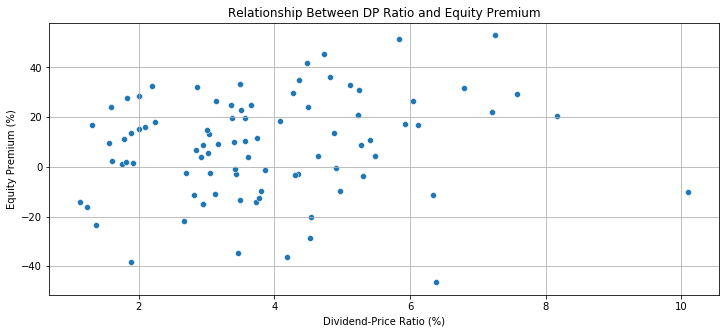

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset
df = pd.read_excel("PredictorData2020.xlsx",sheet_name="Annual", na_values="NaN")
df = df.loc[:,['yyyy', 'D12', 'Index', 'Rfree', 'CRSP_SPvw']].dropna()
df
df.info()

# Create new variables: Dividend-Price Ratio (DP) and Equity Premium (ep_crsp)
df['DP'] = 100 * df['D12'] / df['Index'] # Dividend-Price Ratio in percentage
df['ep_crsp'] = 100 * (df['CRSP_SPvw']- df['Rfree']) # Equity premium (next year return - risk-free rate)
df['ep_crsp'] = df['ep_crsp'].shift(-1)
df = df.dropna()

# Filter data for years between 1926 and 2015
df_filtered = df[(df['yyyy'] >= 1926) & (df['yyyy'] < 2015)].copy()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_filtered['DP'], y=df_filtered['ep_crsp']) 
plt.xlabel("Dividend-Price Ratio (%)")
plt.ylabel("Equity Premium (%)")
plt.title("Relationship Between DP Ratio and Equity Premium")
plt.grid(True)
plt.show()




Are financial returns predictable? Observing historical patterns, years with a high dividend-price (DP) ratio (e.g., above 5%) often precede periods of strong positive returns. However, lower DP ratios have been followed by both moderate gains and occasional losses. On average, future returns tend to be higher after years with elevated DP ratios. The economic reasoning behind this is that a higher DP ratio makes the asset more appealing to investors, leading to increased demand and upward pressure on the stock price, which serves as the denominator in the ratio.

Scatter plots can sometimes be challenging to interpret when analyzing the relationship between two variables. In such cases, adding a regression line helps visualize the trend more clearly. The regression line represents the expected average equity premium for a given dividend-price (DP) ratio.

In Python, we can achieve this using [`Seaborn`](https://seaborn.pydata.org/), which provides an easy way to add a linear regression line to a scatter plot with the [`sns.regplot()`](https://seaborn.pydata.org/tutorial/regression.html) function. Here’s how to do it:



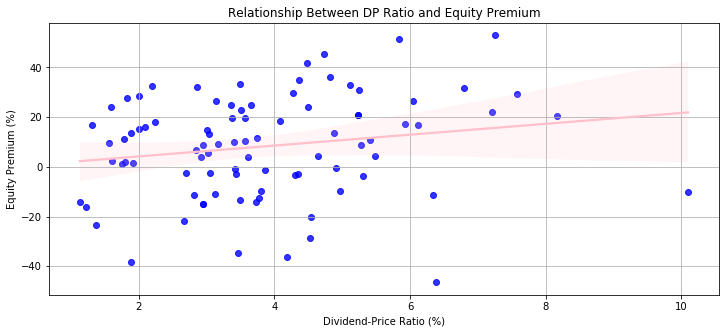

In [2]:
import seaborn as sns

plt.figure(figsize=(12, 5)) 

sns.regplot(x=df_filtered['DP'], y=df_filtered['ep_crsp'], color='blue', line_kws={'color': 'pink'} )

plt.xlabel("Dividend-Price Ratio (%)")
plt.ylabel("Equity Premium (%)")
plt.title("Relationship Between DP Ratio and Equity Premium")
plt.grid(True)
plt.show()


We can also extract the regression line parameters (slope and intercept) using [statsmodels](https://www.statsmodels.org/stable/index.html) or [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [3]:
import scipy.stats as stats

# Perform Linear Regression
res= stats.linregress(x=df_filtered['DP'], y=df_filtered['ep_crsp'])
#print(res)
#Print Parameters
print(f"Slope (β1): {res.slope:.4f}")
print(f"Intercept (β0): {res.intercept:.4f}")


Slope (β1): 2.1865
Intercept (β0): -0.1903


The regression line has an upward slope, indicating that higher values of the dividend-price (DP) ratio are associated with higher expected equity premiums in the following years. The estimated regression equation is:

$$\text{Equity Premium} = -0.1903 + 2.1865 \times DP$$

This means that if the DP ratio is 2.5%, the model predicts that the equity premium for the next year will be:

$$-0.1903 + 2.1865 \times 2.5 = 5.28\%$$

Similarly, if the DP ratio is 5%, the predicted equity premium is:

$$ -0.1903 + 2.1865 \times 5 = 10.74\%$$

However, the data points are widely scattered around the regression line, suggesting that while DP has some explanatory power, it is not a precise predictor of future returns. For example, in years where the DP ratio was around 5%, observed equity premiums ranged from -10% to 38%, despite the model predicting 10.74%.

Additionally, the behavior of very low DP ratios (below 2.5%) appears somewhat puzzling. Historical data shows that, even when the DP was extremely low, the equity premium remained mostly positive, ranging between 0% and 25%, with only a few instances of negative returns. This suggests that while there is some relationship between the dividend-price ratio and future returns, there is still considerable **uncertainty and variability** in the predictions.


A scatter plot is a great tool for visualizing relationships between two variables, but it does not capture time series characteristics that might reveal important patterns. The figures below display the dividend-price (DP) ratio and equity premium over time, beginning in 1926.



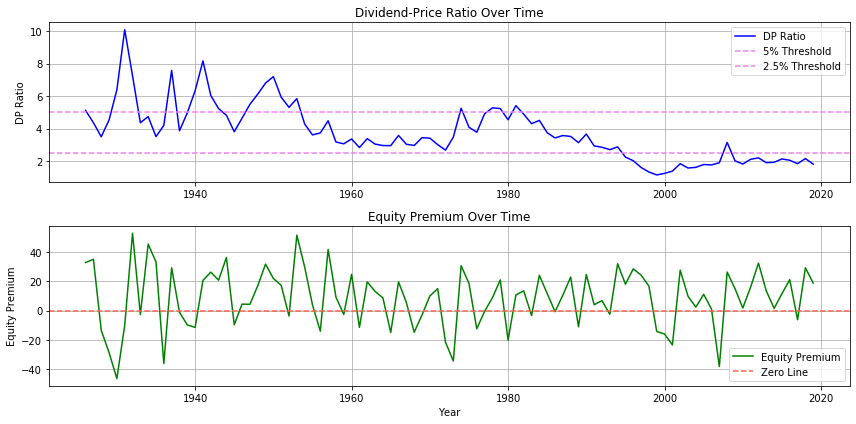

In [4]:
plt.figure(figsize=(12, 6))

# Plot Dividend-Price (DP) Ratio Over Time
plt.subplot(2, 1, 1)
plt.plot(df['yyyy'], df['DP'], label="DP Ratio", color='blue')
plt.axhline(y=5, color="violet", linestyle="--", label="5% Threshold")
plt.axhline(y=2.5, color="violet", linestyle="--", label="2.5% Threshold")
plt.xlabel("")
plt.ylabel("DP Ratio")
plt.title("Dividend-Price Ratio Over Time")
plt.legend()
plt.grid()

# Plot Equity Premium Over Time
plt.subplot(2, 1, 2)
plt.plot(df['yyyy'], df['ep_crsp'], label="Equity Premium", color='green')
plt.axhline(y=0, color="tomato", linestyle="--", label="Zero Line")
plt.xlabel("Year")
plt.ylabel("Equity Premium")
plt.title("Equity Premium Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Key Observations on the DP Ratio:
- The DP ratio was above 5% primarily between the mid-1930s and mid-1950s.
- Between 1955 and 1995, it fluctuated within the 2.5% - 5% range.
- Since 1995, it has remained below 2.5%, with the exception of 2008.
- Interestingly, before 1995, the DP ratio never dropped below 2.5%. However, even in the years when it was below this level, the equity premium remained positive, sometimes exceeding expectations based on the regression model.

Key Observations on the Equity Premium:
- Unlike the DP ratio, the equity premium does not show a strong trend over time.
- It fluctuated between +25% and -25% throughout the sample period, suggesting considerable volatility.



Questions: 

1. Will the DP ratio return to 5% or higher in the future?

2. Is the historical relationship between the DP ratio and the equity premium still a reliable guide for future returns?

3. Has the relationship between these variables changed over time?



## 3.1 LRM with one independent variable
A common assumption in linear regression models (LRMs) is that there is a linear relationship between a dependent variable $(Y)$ and an independent variable $(X)$. When both variables are observed at the same point in time $(t)$, we write:

$$
Y_t = \beta_0 + \beta_1 \, X_t + \varepsilon_t,
$$

where:

- $(Y_t)$ is the dependent variable,  
- $(X_t)$ is the independent variable,  
- $(\beta_0)$ and $(\beta_1)$ are parameters to be estimated,  
- $(\varepsilon_t)$ is the error term.

We typically use $(t)$ when the variables are observed over time (*time series data*) or an index $(i)$ when they vary across different individuals, firms, or countries at one point in time (*cross-sectional or longitudinal data*). The primary goal of the LRM is to use the variation in $(X)$ to explain the variation in $(Y)$. For instance, when predicting the equity premium (the excess return of stocks over a risk-free rate) for certain years, one might use a predictor such as the dividend-price ratio (DP).


### 3.1.1 Estimating the Linear Regression Model via OLS

Ordinary Least Squares (OLS) is one of the most common methods for estimating the parameters of a linear regression. OLS finds $(\beta_0)$ and $(\beta_1)$ by minimizing the sum of squared residuals, $(\sum_t \varepsilon_t^2)$. In a simple regression with one regressor, the slope estimate has the closed-form solution:

$$
\hat{\beta}_1 = \frac{\hat{\sigma}_{X,Y}}{\hat{\sigma}_X^2} \;=\; \hat{\rho}_{X,Y} \cdot \frac{\hat{\sigma}_Y}{\hat{\sigma}_X},
$$

where:

- $(\hat{\sigma}_X^2) $ is the sample variances of $(X)$,  
- $(\hat{\sigma}_{X,Y})$ is the sample covariance between $(X)$ and $(Y)$,  
- $(\hat{\rho}_{X,Y})$ is the sample correlation between $(X)$ and $(Y)$.

The intercept estimate is:

$$
\hat{\beta}_0 = \overline{Y} \;-\; \hat{\beta}_1 \; \overline{X},
$$

where $(\overline{X})$ and $(\overline{Y})$ are the sample means of $(X)$ and $(Y)$, respectively.

### 3.1.2  Illustration with the Dividend-Price Ratio

In this example, our dependent variable is $(Y_{t+1})$ = annual equity premium (`ep_crsp`) for the subsequent year, and our independent variable is $(X_t)$ = the dividend-price ratio (`DP`) for the current year. To compute $(\hat{\beta}_1)$, we need the sample covariance between `ep_crsp` and `DP`, and the sample variance of `DP`.

Below is an example in Python, assuming you have a pandas DataFrame called `df_filtered` with columns `ep_crsp` and `DP`:






In [5]:
# Slope estimate via covariance and variance
beta1_via_cov_var = df_filtered['ep_crsp'].cov(df_filtered['DP']) / df_filtered['DP'].var()
print(f"Slope (β1):{beta1_via_cov_var}") 

Slope (β1):2.186478067326735


Interpreting this result, if the dividend-price ratio increases by 1 percentage point, we expect the following year’s equity premium to increase by about 1.86 percentage points, on average.

Alternatively, we can use the correlation coefficient and the ratio of standard deviations:

In [6]:
beta1_via_corr = (df_filtered['ep_crsp'].corr(df_filtered['DP']) *
                  df_filtered['ep_crsp'].std() / df_filtered['DP'].std())
print(beta1_via_corr) 

2.1864780673267354


Here, the correlation is “scaled” by the ratio of the standard deviations. If both variables were standardized to have standard deviation 1, the correlation itself would numerically match the slope.

Given $\hat{\beta}_1$, we then calculate the intercept:

In [7]:
beta0 = df_filtered['ep_crsp'].mean() - beta1_via_cov_var * df_filtered['DP'].mean()
print(f"Intercept (β0):{beta0}")

Intercept (β0):-0.19032678914987322


### 3.1.3 Estimating via a Python Regression Package

Rather than manually computing these estimates, Python’s [`statsmodels`](https://www.statsmodels.org/stable/index.html) automatically calculates regression coefficients, standard errors, and other diagnostic measures:

In [8]:
import statsmodels.api as sm
X = df_filtered['DP']
# Add a constant term (intercept) to the predictor
X = sm.add_constant(X)
y = df_filtered['ep_crsp']

model = sm.OLS(y , X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                ep_crsp   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.061
Date:                Mon, 17 Feb 2025   Prob (F-statistic):             0.0837
Time:                        21:41:53   Log-Likelihood:                -392.57
No. Observations:                  89   AIC:                             789.1
Df Residuals:                      87   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1903      5.274     -0.036      0.9

#### **OLS Output Terminology**

- **Estimate**:  
  The OLS estimates of the coefficients in the Linear Regression Model (LRM).

- **Std. Error**:  
  The standard errors represent the standard deviations of the estimates. They measure the uncertainty in the sample about each coefficient.

- **t value**:  
  The ratio of the estimate to its standard error. It represents the t-statistic for testing the null hypothesis $(H_0: \beta_i = 0)$ (for $(i = 0, 1, \ldots)$).  
  In large samples, the t-statistic approximately follows a standard normal distribution. Critical values (two-sided) at:
  - 10% significance: 1.64  
  - 5% significance: 1.96  
  - 1% significance: 2.58  
  The null hypothesis \(H_0: \beta_i = 0\) is rejected if the absolute value of the t-statistic exceeds the critical value.

- **Pr(\(|t|\))** (p-value):  
  The probability that a standard normal variable takes a value larger in absolute terms than the observed t-statistic. The null $(H_0: \beta_i = 0)$ is rejected in favor of $(H_1: \beta_i \neq 0)$ if the p-value is smaller than the chosen significance level (e.g., 1%, 5%, 10%).

- **Residual standard error**:  
  The standard deviation (or square root of the variance) of the residuals, where  
  $$
    \hat{\varepsilon}_t = Y_t - \hat{\beta}_0 - \hat{\beta}_1 \, X_t.
  $$

- **$(R^2)$**:  
  A measure of goodness-of-fit that indicates the proportion of the variance of the dependent variable explained by the model. It ranges from 0 to 1:
  - 0 means the model does not explain any of the variation in $(Y)$.  
  - 1 means the model explains all of the variation perfectly.

- **Adjusted $(R^2)$**:  
  A modified version of $(R^2)$ that penalizes the inclusion of additional parameters in the model. Since $(R^2)$ does not decrease when more predictors are added, the adjusted $(R^2)$ is often used to compare models with differing numbers of independent variables.

- **F-statistic**:  
  Tests the null hypothesis that all slope coefficients are jointly zero (i.e., the model has no explanatory power) against the alternative that at least one slope coefficient is different from zero. The critical value for the F-statistic depends on the sample size and the number of predictors.


Note: The quantities discussed above should sound familiar and reflect concepts that you understand already. If they are not familiar, please review a introductory econometrics textbook or Statistics textbook.  




The regression results indicate that a 1% increase in the dividend-price (DP) ratio leads to an estimated 2.19% increase in future equity returns. This confirms the idea that higher DP ratios are associated with higher future returns.

**Statistical Significance:**
- The coefficient of the DP ratio is 2.1865.
- The t-statistic is 1.75, with a p-value of 0.08, meaning the relationship is statistically significant at the 10% level but not at 5%.
- This suggests some predictive power of the DP ratio, but the evidence is not overwhelmingly strong.

**Goodness-of-Fit:**
- The $R^2$ value is 0.034 (3.4%), meaning that only 3.4% of the variation in the equity premium is explained by the DP ratio.
- This is close to zero, indicating that the DP ratio alone has limited predictive power.

While we find evidence that returns are predictable, the predictive strength of the DP ratio is weak. This suggests that other factors may provide stronger predictive insights for equity premiums, highlighting the need for further research into additional variables.

**Fitted Values & Residuals:**

Based on the coefficient estimates, we can then calculate the fitted values and the residuals of the regression model.

- The fitted values (red dashed line in the first graph) represent the predicted equity premium for each year based on the regression equation:
$$ \hat{\text{EP}}_{t+1} = \beta_0 + \beta_1 \times DP_t $$

- The residuals (bottom graph) measure the difference between actual and predicted returns, showing how much of the equity premium remains unexplained by the DP ratio.


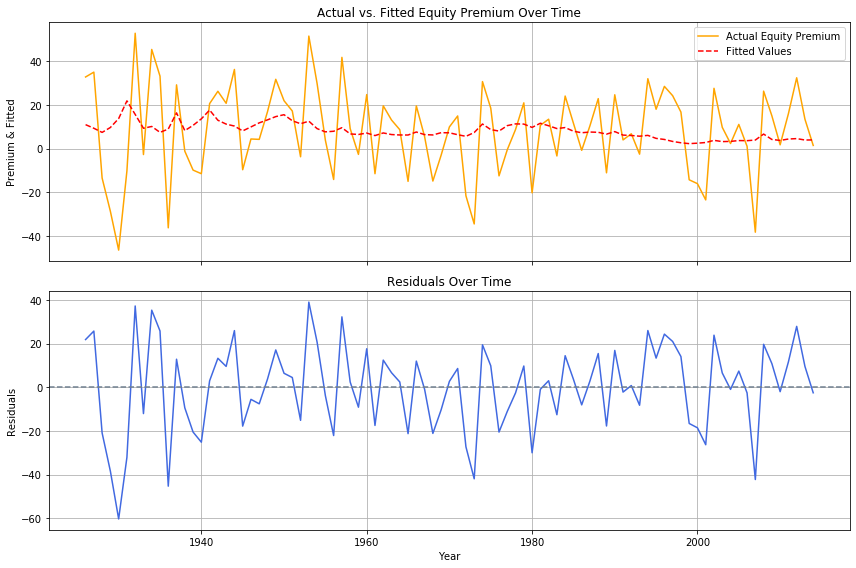

In [9]:
df_filtered['predicted_ep'] = beta0 + beta1_via_cov_var * df_filtered['DP']
df_filtered['residuals'] = df_filtered['ep_crsp']- df_filtered['predicted_ep']

# Create the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot actual and predicted equity premium
axes[0].plot(df_filtered['yyyy'], df_filtered['ep_crsp'], color="orange", label="Actual Equity Premium")
axes[0].plot(df_filtered['yyyy'], df_filtered['predicted_ep'], color="red", linestyle="--", label="Fitted Values")
axes[0].set_ylabel("Premium & Fitted")
axes[0].legend()
axes[0].grid()
axes[0].set_title("Actual vs. Fitted Equity Premium Over Time")

# Plot residuals
axes[1].plot(df_filtered['yyyy'], df_filtered['residuals'], color="royalblue", label="Residuals")
axes[1].axhline(y=0, color="slategray", linestyle="--")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Residuals")
axes[1].grid()
axes[1].set_title("Residuals Over Time")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##  3.2 Robust standard errors

In ordinary least squares (OLS) regression, the standard errors reported by default assume that the error terms $\hat{\varepsilon}_t$ 
have a constant variance (homoskedasticity) and, in a time series context, that they are uncorrelated across observations. In practice, these assumptions may be violated. In practice, these assumptions may be violated. The variance of the errors can change over time (heteroskedasticity), and errors can exhibit dependence or autocorrelation. 

For example, if a positive residual in one period makes it more likely that subsequent residuals are also positive, this indicates autocorrelation. When homoskedasticity and independence assumptions do not hold, naive standard errors will typically be underestimated, leading to overly optimistic t-statistics and incorrect inference.

To address these issues:

- HC (Heteroskedasticity-Consistent) standard errors are often used in cross-sectional settings.

- HAC (Heteroskedasticity and Autocorrelation Consistent) standard errors, as proposed by Newey and West (1987), are widely used for time series data.

A general rule of thumb in time series work is to use HAC standard errors by default. If the errors are actually homoskedastic and uncorrelated, the loss of efficiency is usually small.

Below is an example in Python using the statsmodels package, illustrating how to estimate OLS and obtain Newey-West HAC standard errors. We replicate a regression of the equity premium (`ep_crsp`) on the dividend-price ratio (`DP`) from a dataset called data.


In [10]:
from statsmodels.stats.outliers_influence import summary_table

# 1. Prepare the data
X = df_filtered['DP']
X = sm.add_constant(X) # Add a constant term (intercept) to the predictor
y = df_filtered['ep_crsp']

# 2. Fit the OLS model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

# 3. Print the standard summary (homoskedastic/uncorrelated assumption)
print("=== OLS Results (Default Standard Errors) ===")
print(ols_results.summary())


=== OLS Results (Default Standard Errors) ===
                            OLS Regression Results                            
Dep. Variable:                ep_crsp   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.061
Date:                Mon, 17 Feb 2025   Prob (F-statistic):             0.0837
Time:                        21:41:53   Log-Likelihood:                -392.57
No. Observations:                  89   AIC:                             789.1
Df Residuals:                      87   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

In [11]:
# 4. Fit the model again, requesting Newey-West HAC standard errors
#    'maxlags' is a hyperparameter specifying how many lags to consider for autocorrelation.
#    In practice, you would choose maxlags based on domain knowledge or data frequency.
hac_results = ols_model.fit(cov_type='HAC', cov_kwds={'maxlags':1})

print("\n=== OLS Results (HAC/ Newey-West Standard Errors) ===")
print(hac_results.summary())



=== OLS Results (HAC/ Newey-West Standard Errors) ===
                            OLS Regression Results                            
Dep. Variable:                ep_crsp   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.135
Date:                Mon, 17 Feb 2025   Prob (F-statistic):              0.148
Time:                        21:41:53   Log-Likelihood:                -392.57
No. Observations:                  89   AIC:                             789.1
Df Residuals:                      87   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

Notice that: 
- The OLS point estimates ($\hat{\beta}_0$ and $\hat{\beta}_1$) do not change when using robust or HAC standard errors because these estimators are still unbiased (assuming the core OLS conditions for unbiasedness hold). Only the standard errors (and therefore t-stats, p-values, etc.) are adjusted.

- With HAC, the standard errors typically increase if heteroskedasticity or autocorrelation is present, leading to smaller t-statistics and higher p-values. For example, a slope coefficient that was barely significant at the 10% level may become less significant once corrected for for serial correlation. 

- When dealing with time series data it is good practice to estimate HAC standard errors by default. If the residuals truly have constant variance and no autocorrelation, you lose little by using HAC. However, if you ignore heteroskedasticity or autocorrelation, you can draw incorrect conclusions due to underestimating uncertainty.

## 3.3 Functional forms
### 3.3.1 Quadratic and Polynomial Regression

In the previous example, we assumed a **linear relationship** between the independent variable $(X)$ and the dependent variable $(Y)$. However, in some cases, the relationship between $(X)$ and $(Y)$ may not be well-explained by a linear model. This happens when the effect of $(X)$ on $(Y)$ depends on the level of $(X)$. In this section, we discuss two **nonlinear functional forms** that are commonly used in financial applications.

One way to introduce **nonlinearity** is by adding a **quadratic term** to the regression model:

$$
Y_t = \beta_0 + \beta_1 X_t + \beta_2 X_t^2 + \varepsilon_t
$$


This introduces **curvature** to the relationship between $(X)$ and $(Y)$, which remains estimable via OLS. The effect of a one-unit increase in $(X)$ on $(Y)$ is now:

$$
\beta_1 + 2\beta_2 X_t
$$


indicating that the impact of $(X)$ depends on its own level. Similarly, **higher-order polynomials** can be used, such as **cubic regression**:

$$
Y_t = \beta_0 + \beta_1 X_t + \beta_2 X_t^2 + \beta_3 X_t^3 + \varepsilon_t
$$

While polynomials capture more complex relationships, care must be taken as higher powers of $(X_t)$ can be highly correlated, leading to multicollinearity.


We can estimate polynomial regressions using `statsmodels` in Python:


In [12]:
import numpy as np
# Example dataset
data = pd.DataFrame({
    'X': np.linspace(0, 10, 100),
    'Y': 3 + 2 * np.linspace(0, 10, 100) + 0.5 * np.linspace(0, 10, 100)**2 + np.random.randn(100)
})

# Generate polynomial terms
data['X2'] = data['X'] ** 2
data['X3'] = data['X'] ** 3

# Fit quadratic model
X_quad = sm.add_constant(data[['X', 'X2']])
model_quad = sm.OLS(data['Y'], X_quad).fit()

# Fit cubic model
X_cubic = sm.add_constant(data[['X', 'X2', 'X3']])
model_cubic = sm.OLS(data['Y'], X_cubic).fit()

# Print results
print("Quadratic Model:\n", model_quad.summary())
print("Cubic Model:\n", model_cubic.summary())

Quadratic Model:
                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.591e+04
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          4.64e-133
Time:                        21:41:53   Log-Likelihood:                -131.95
No. Observations:                 100   AIC:                             269.9
Df Residuals:                      97   BIC:                             277.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5695      0.270  

### 3.3.2 Threshold Models (Piecewise Regression)

Another form of nonlinearity occurs when the effect of $X$ on $Y$ changes above or below a threshold value $m$. This is useful for cases where relationships behave differently in different market conditions. To implement a **threshold model**, we define two new variables: 

$$

X_t \cdot I(X_t \geq m) \quad \text{and} \quad X_t \cdot I(X_t < m)

$$

where $( I(A) )$ is an **indicator function** that equals **1** if the condition $(A)$ holds and **0** otherwise. The threshold regression model is:

$$
Y_t = \beta_0 + \beta_1 X_t \cdot I(X_t \geq m) + \beta_2 X_t \cdot I(X_t < m) + \varepsilon_t
$$

Alternatively, a **single interaction term** can be used:


$$
Y_t = \gamma_0 + \gamma_1 X_t + \gamma_2 X_t \cdot I(X_t \geq m) + \varepsilon_t
$$

where $( \gamma_2 )$ captures the **differential effect** when $( X_t )$ crosses the threshold $( m )$. Testing the null hypothesis that  $ \gamma_2 = 0 $
  represents a way to evaluate whether there is a nonlinear relationship between the two variables.


### 3.3.3 Simulating Models in Python

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     835.1
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.18e-97
Time:                        21:41:53   Log-Likelihood:                -278.27
No. Observations:                 200   AIC:                             562.5
Df Residuals:                     197   BIC:                             572.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1749      0.085      2.053      0.0

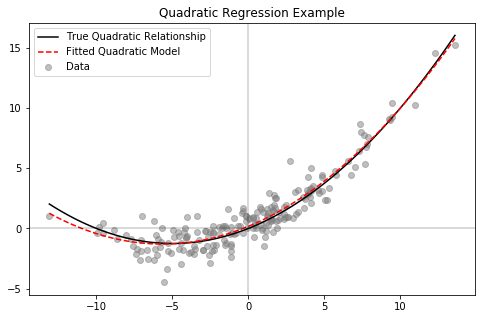

In [13]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
T = 200
X = np.random.normal(0, 5, T)  # X ~ N(0, 25)
eps = np.random.normal(0, 1, T)  # epsilon ~ N(0,1)
Y = 0 + 0.5 * X + 0.05 * X**2 + eps  # Quadratic relationship

# Fit an OLS model with quadratic term
X_poly = np.column_stack((X, X**2))  # Add X^2 term
X_poly = sm.add_constant(X_poly)  # Add intercept
model = sm.OLS(Y, X_poly).fit()

# Print regression results
print(model.summary())

# Generate data for plotting
x_range = np.linspace(min(X), max(X), 100)
y_true = 0 + 0.5 * x_range + 0.05 * x_range**2  # True function
y_pred = model.params[0] + model.params[1] * x_range + model.params[2] * x_range**2  # Fitted

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color="gray", alpha=0.5, label="Data")
plt.plot(x_range, y_true, color="black", label="True Quadratic Relationship")
plt.plot(x_range, y_pred, color="red", linestyle="--", label="Fitted Quadratic Model")
plt.axhline(0, color="black", alpha=0.2)
plt.axvline(0, color="black", alpha=0.2)
plt.legend()
plt.title("Quadratic Regression Example")
plt.show()

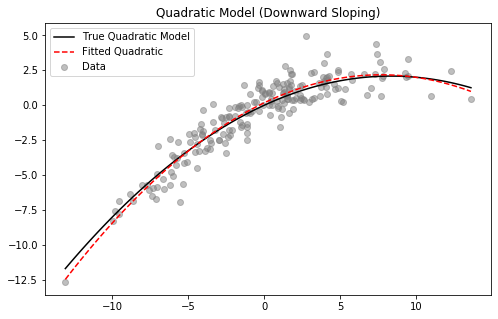

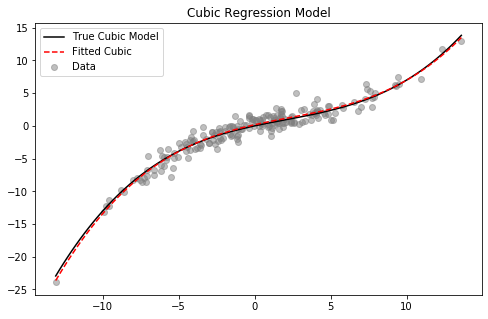

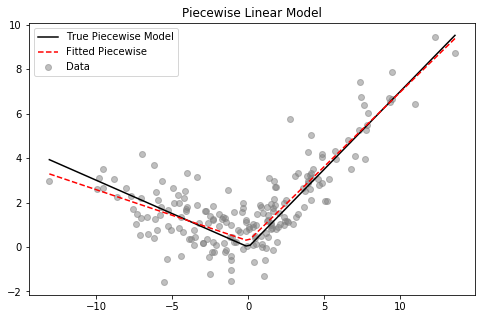

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

T = 200
X = np.random.normal(0, 5, T)  # X ~ N(0, 25)
eps = np.random.normal(0, 1, T)  # epsilon ~ N(0,1)

# **Quadratic Model with Negative Coefficient**
Y_quad = 0.5 * X - 0.03 * X**2 + eps  # Downward sloping parabola
X_quad = np.column_stack((X, X**2))  # Add X^2 term
X_quad = sm.add_constant(X_quad)  # Add intercept
model_quad = sm.OLS(Y_quad, X_quad).fit()

# **Cubic Model**
Y_cubic = 0.5 * X - 0.03 * X**2 + 0.005 * X**3 + eps  # Cubic polynomial
X_cubic = np.column_stack((X, X**2, X**3))
X_cubic = sm.add_constant(X_cubic)
model_cubic = sm.OLS(Y_cubic, X_cubic).fit()

# **Piecewise Linear Model**
m = 0  # Threshold
Y_piecewise = 0.7 * X * (X >= m) - 0.3 * X * (X < m) + eps
X_piecewise = np.column_stack((X * (X >= m), X * (X < m)))  # Piecewise interaction terms
X_piecewise = sm.add_constant(X_piecewise)
model_piecewise = sm.OLS(Y_piecewise, X_piecewise).fit()

# **Plot Quadratic Model**
x_range = np.linspace(min(X), max(X), 100)
y_quad_true = 0.5 * x_range - 0.03 * x_range**2
y_quad_pred = model_quad.params[0] + model_quad.params[1] * x_range + model_quad.params[2] * x_range**2

plt.figure(figsize=(8, 5))
plt.scatter(X, Y_quad, color="gray", alpha=0.5, label="Data")
plt.plot(x_range, y_quad_true, color="black", label="True Quadratic Model")
plt.plot(x_range, y_quad_pred, color="red", linestyle="--", label="Fitted Quadratic")
plt.legend()
plt.title("Quadratic Model (Downward Sloping)")
plt.show()

# **Plot Cubic Model**
y_cubic_true = 0.5 * x_range - 0.03 * x_range**2 + 0.005 * x_range**3
y_cubic_pred = model_cubic.params[0] + model_cubic.params[1] * x_range + model_cubic.params[2] * x_range**2 + model_cubic.params[3] * x_range**3

plt.figure(figsize=(8, 5))
plt.scatter(X, Y_cubic, color="gray", alpha=0.5, label="Data")
plt.plot(x_range, y_cubic_true, color="black", label="True Cubic Model")
plt.plot(x_range, y_cubic_pred, color="red", linestyle="--", label="Fitted Cubic")
plt.legend()
plt.title("Cubic Regression Model")
plt.show()

# **Plot Piecewise Linear Model**
y_piecewise_true = 0.7 * x_range * (x_range >= m) - 0.3 * x_range * (x_range < m)
y_piecewise_pred = model_piecewise.params[0] + model_piecewise.params[1] * x_range * (x_range >= m) + model_piecewise.params[2] * x_range * (x_range < m)

plt.figure(figsize=(8, 5))
plt.scatter(X, Y_piecewise, color="gray", alpha=0.5, label="Data")
plt.plot(x_range, y_piecewise_true, color="black", label="True Piecewise Model")
plt.plot(x_range, y_piecewise_pred, color="red", linestyle="--", label="Fitted Piecewise")
plt.legend()
plt.title("Piecewise Linear Model")
plt.show()

### 3.3.4  Application: Are hedge fund returns nonlinear?

An interesting application of nonlinear functional forms is to model hedge fund returns. Unlike mutual funds that take long positions and avoid excessive leverage, hedge funds often use derivatives and short positions, leading to nonlinear payoffs.

For example, if a hedge fund holds a call option on a stock, its performance will be highly nonlinear relative to the underlying asset price. A linear model may fail to capture this.

To empirically analyze hedge fund returns, we use data from the Credit Suisse Hedge Fund Indexes, which track hedge fund performance across various strategies (e.g., convertible arbitrage, event-driven, long-short equity).

The dataset `hedgefunds.xlsx` contains monthly returns for 14 hedge fund indexes, starting in January 1993. We can explore nonlinear effects using quadratic regression or threshold models.



In [15]:
hfret = pd.read_excel ('hedgefunds.xlsx')
# Shift the first row one position to the right
hfret.iloc[0] = hfret.iloc[0].shift(1)
# Assign 'Date' as the first column header
hfret.iloc [0,0] = 'Date'
# Drop unnecessary rows (likely metadata) and remove columns with all NaN values
hfret = hfret.drop(hfret.index[1:3]).dropna(axis=1)
# Set the first row as column headers
hfret.columns = hfret.iloc[0]
# Remove the first row from the dataset since it is now the header
hfret = hfret[1:]
# Convert the 'Date' column to datetime format
hfret['Date'] = pd.to_datetime(hfret['Date'])
# Set the 'Date' column as the index
hfret.set_index('Date', inplace= True)
# Sort the dataframe by date in ascending order
hfret = hfret.sort_values('Date', ascending=True)

hfret

,Credit Suisse Hedge Fund Index,Credit Suisse Convertible Arbitrage Hedge Fund Index,Credit Suisse Emerging Markets Hedge Fund Index,Credit Suisse Equity Market Neutral Hedge Fund Index,Credit Suisse Event Driven Hedge Fund Index,Credit Suisse Event Driven Distressed Hedge Fund Index,Credit Suisse Event Driven Multi-Strategy Hedge Fund Index,Credit Suisse Event Driven Risk Arbitrage Hedge Fund Index,Credit Suisse Fixed Income Arbitrage Hedge Fund Index,Credit Suisse Global Macro Hedge Fund Index,Credit Suisse Long/Short Equity Hedge Fund Index,Credit Suisse Managed Futures Hedge Fund Index
Date,,,,,,,,,,,,
1993-12-31,100,100,100,100,100,100,100,100,100,100,100,100
1994-01-31,101.14,100.36,110.54,99.48,103.68,103.94,103.6,100.57,101.3,100.17,101.2,100.22
1994-02-28,97,100.51,109.28,99.72,103.52,103.59,103.71,100.13,99.27,94.51,98.7,101.42
1994-03-31,93.54,99.54,104.24,99.48,102.18,101.69,102.85,101.99,97.6,90.47,94.85,104.06
1994-04-30,91.91,97.03,95.53,99.73,101.51,100.97,102.26,101.01,97.4,89.03,93.37,104.95
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,832.53,605.59,642.6,340.36,893.21,1048.57,816.57,541.18,446.71,1357.29,1088.56,398.6
2024-09-30,847.28,612.84,674.31,342.71,907.84,1065.12,831.2,543.07,453.2,1397.08,1106.38,405.25
2024-10-31,839.42,620.02,674.84,340.28,914.54,1063.5,839.56,544.09,453.95,1353.73,1100.92,391.23


In [16]:
import yfinance as yf
# Define the ticker symbol for S&P 500 (^GSPC)
ticker = "^GSPC"
# Download S&P 500 data (monthly)
sp500 = yf.download(ticker, start="1993-11-30", end="2024-12-31", interval="1mo")
#sp500 = yf.download(ticker, start="1993-12-31", end="2024-12-31", interval="1mo")
base_value = sp500.loc[:,'Adj Close'][0]
sp500['Index'] = 100 * sp500['Adj Close'] / base_value

sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index
Date,,,,,,,
1993-12-01,461.929993,471.290009,461.450012,466.450012,466.450012,5791210000,100.000000
1994-01-01,466.510010,482.850006,464.359985,481.609985,481.609985,6627390000,103.250075
1994-02-01,481.600006,482.230011,464.260010,467.140015,467.140015,5853100000,100.147926
1994-03-01,467.190002,471.089996,436.160004,445.769989,445.769989,7225010000,95.566508
1994-04-01,445.660004,452.790009,435.859985,450.910004,450.910004,5735010000,96.668451
...,...,...,...,...,...,...,...
2024-08-01,5537.839844,5651.620117,5119.259766,5648.399902,5648.399902,81097300000,1210.933595
2024-09-01,5623.890137,5767.370117,5402.620117,5762.479980,5762.479980,79564830000,1235.390681
2024-10-01,5757.729980,5878.459961,5674.000000,5705.450195,5705.450195,82412430000,1223.164336


In [17]:
hfret['GSPC'] = sp500['Index'].values
hfret

,Credit Suisse Hedge Fund Index,Credit Suisse Convertible Arbitrage Hedge Fund Index,Credit Suisse Emerging Markets Hedge Fund Index,Credit Suisse Equity Market Neutral Hedge Fund Index,Credit Suisse Event Driven Hedge Fund Index,Credit Suisse Event Driven Distressed Hedge Fund Index,Credit Suisse Event Driven Multi-Strategy Hedge Fund Index,Credit Suisse Event Driven Risk Arbitrage Hedge Fund Index,Credit Suisse Fixed Income Arbitrage Hedge Fund Index,Credit Suisse Global Macro Hedge Fund Index,Credit Suisse Long/Short Equity Hedge Fund Index,Credit Suisse Managed Futures Hedge Fund Index,GSPC
Date,,,,,,,,,,,,,
1993-12-31,100,100,100,100,100,100,100,100,100,100,100,100,100.000000
1994-01-31,101.14,100.36,110.54,99.48,103.68,103.94,103.6,100.57,101.3,100.17,101.2,100.22,103.250075
1994-02-28,97,100.51,109.28,99.72,103.52,103.59,103.71,100.13,99.27,94.51,98.7,101.42,100.147926
1994-03-31,93.54,99.54,104.24,99.48,102.18,101.69,102.85,101.99,97.6,90.47,94.85,104.06,95.566508
1994-04-30,91.91,97.03,95.53,99.73,101.51,100.97,102.26,101.01,97.4,89.03,93.37,104.95,96.668451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,832.53,605.59,642.6,340.36,893.21,1048.57,816.57,541.18,446.71,1357.29,1088.56,398.6,1210.933595
2024-09-30,847.28,612.84,674.31,342.71,907.84,1065.12,831.2,543.07,453.2,1397.08,1106.38,405.25,1235.390681
2024-10-31,839.42,620.02,674.84,340.28,914.54,1063.5,839.56,544.09,453.95,1353.73,1100.92,391.23,1223.164336


Below figure shows the change in NAV (Net Asset Value) for these indexes, with some strategies performing extremely well (e.g., global macro) and other performing rather poorly. All strategies seem to have experienced a decline during the 2008-2009 recession, although some strategies were affected to a lesser extent.

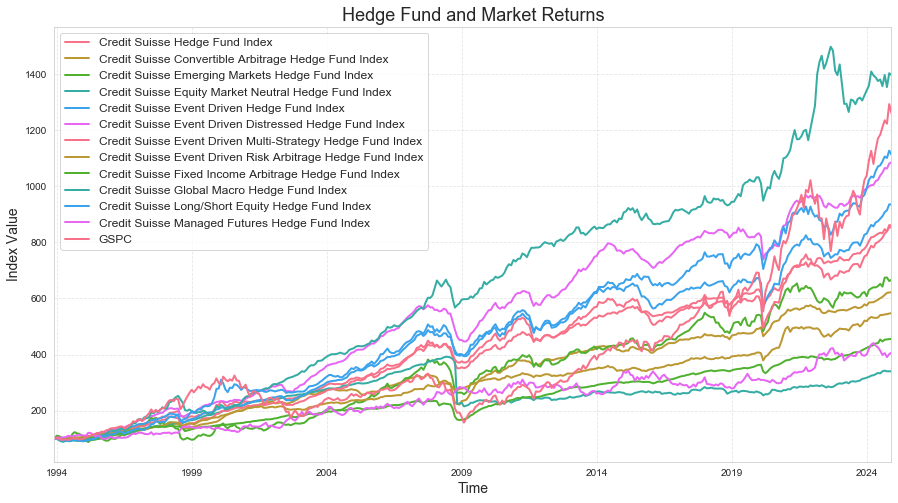

In [18]:
sns.set_style("whitegrid")
sns.set_palette("husl")

hfret.plot(figsize=(15, 8), linewidth=2)
plt.title("Hedge Fund and Market Returns", fontsize=18)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Index Value", fontsize=14)
plt.legend(loc="upper left", fontsize=12, frameon=True)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [19]:
# hfret.plot(figsize=(15, 12))
# plt.show()

In [20]:
from scipy.stats import skew, kurtosis
# Compute monthly returns (percentage change)
returns = hfret.pct_change().dropna()*100

# Compute summary statistics
stats_df = pd.DataFrame({
    'Mean': returns.mean(),
    'Std Dev': returns.std(),
    'Skewness': returns.apply(skew),
    'Kurtosis': returns.apply(kurtosis),
    'Max': returns.max(),
    'Min': returns.min()
})


Alternatively, we can evaluate and compare the descriptive statistics of the strategies by calculating the mean, standard deviation, skewness, and kurtosis for the monthly returns defined as the percentage change of the NAV.

In [21]:
stats_df
stats_df.style.format("{:.2f}")

,Mean,Std Dev,Skewness,Kurtosis,Max,Min
0,,,,,,
Credit Suisse Hedge Fund Index,0.60,1.87,-0.25,3.89,8.53,-7.55
Credit Suisse Convertible Arbitrage Hedge Fund Index,0.51,1.70,-2.59,18.51,5.81,-12.59
Credit Suisse Emerging Markets Hedge Fund Index,0.58,3.59,-0.77,6.93,16.42,-23.03
Credit Suisse Equity Market Neutral Hedge Fund Index,0.37,2.43,-12.80,211.87,4.34,-40.45
Credit Suisse Event Driven Hedge Fund Index,0.62,1.87,-2.32,13.62,6.75,-13.47
Credit Suisse Event Driven Distressed Hedge Fund Index,0.66,1.76,-1.98,11.95,6.90,-12.45
Credit Suisse Event Driven Multi-Strategy Hedge Fund Index,0.60,2.07,-2.17,12.94,6.89,-15.59
Credit Suisse Event Driven Risk Arbitrage Hedge Fund Index,0.47,1.27,-0.61,5.38,6.05,-6.35
Credit Suisse Fixed Income Arbitrage Hedge Fund Index,0.42,1.40,-4.60,36.93,4.33,-14.04


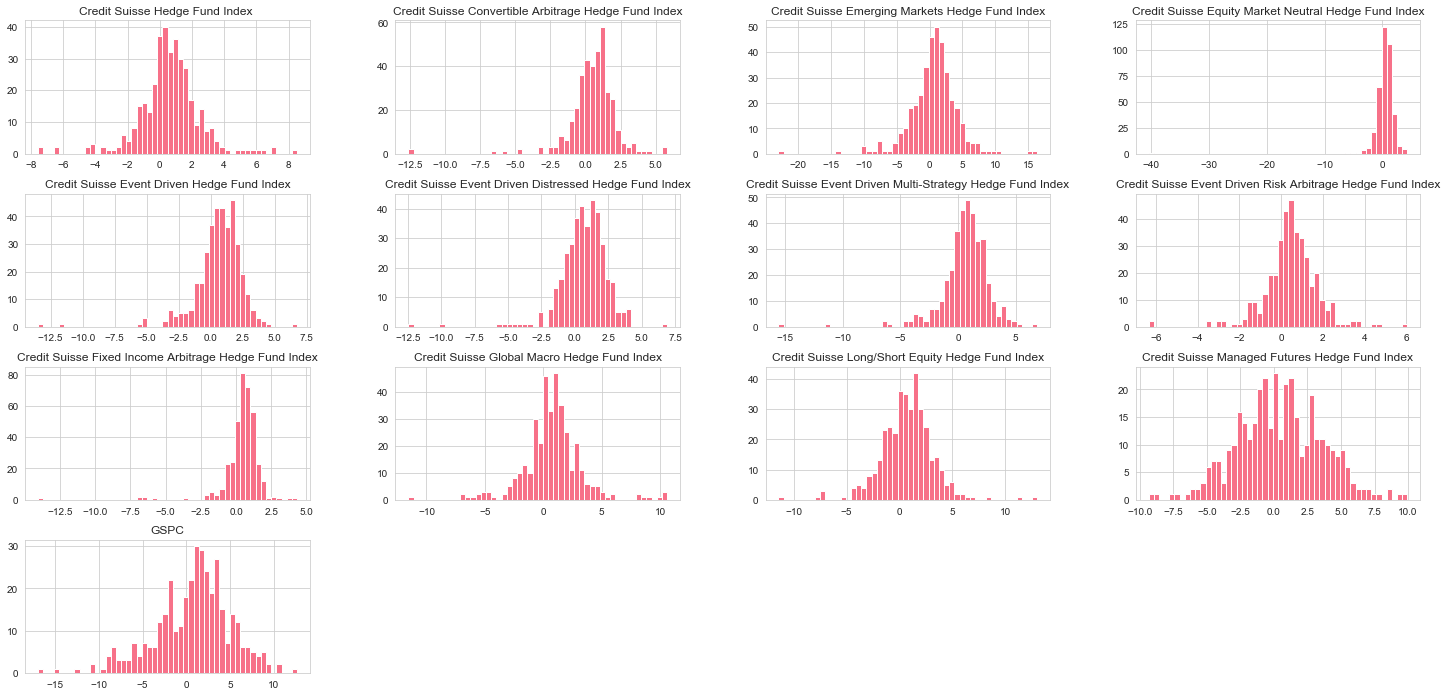

In [22]:
returns.hist(bins=50 , figsize=(25, 12))
plt.show()

Key takeaways from the table:

1. Performance Across Strategies:

- The best-performing strategy is Global Macro, with an average return of 0.74% per month.
- The worst-performing strategy appears to be Equity Market Neutral, with an average return of 0.36%.
- The S&P 500 Index had an average monthly return of 0.78%, while the Credit Suisse Hedge Fund Index had an average return of 0.60%.


2. Volatility & Risk:

- The S&P 500 Index had a monthly standard deviation of 4.34%, indicating higher volatility.
- The Credit Suisse Hedge Fund Index had a lower standard deviation of 1.87%, reflecting more stable returns.
- The least volatile hedge fund strategy was Fixed Income Arbitrage (1.39%), while the most volatile was Emerging Markets (3.58%).

3. Risk-Return Tradeoff:

- Hedge fund strategies, in general, exhibit lower volatility compared to the S&P 500, suggesting a more favorable risk-adjusted return.
- Many hedge fund strategies deliver returns similar to or higher than the S&P 500, but with significantly less risk. 


4. Skewness & Kurtosis:

- Most hedge fund strategies exhibit negative skewness, indicating that large negative returns are more likely than large positive ones.
- Kurtosis values are high, which suggests the presence of fat-tailed distributions—meaning extreme values (both losses and gains) occur more frequently than in a normal distribution.
- Equity Market Neutral has an extremely high kurtosis of 211.87, suggesting significant outliers, which may require further investigation.

5. Extreme Monthly Movements (Min & Max Returns):

- The maximum return observed was 12.68% (long/short equilty Index), while the minimum return was -40.45% (equity market neutral).
- Such extreme observations indicate that some hedge fund strategies might have experienced significant market stress events.

In [23]:
#returns = returns[(returns.index <= '2020-1-1')]

In [24]:
returns.corr()['GSPC'].sort_values(ascending=False)

0
GSPC                                                          1.000000
Credit Suisse Long/Short Equity Hedge Fund Index              0.701212
Credit Suisse Event Driven Hedge Fund Index                   0.668279
Credit Suisse Event Driven Multi-Strategy Hedge Fund Index    0.644826
Credit Suisse Event Driven Distressed Hedge Fund Index        0.599120
Credit Suisse Hedge Fund Index                                0.590845
Credit Suisse Emerging Markets Hedge Fund Index               0.518031
Credit Suisse Event Driven Risk Arbitrage Hedge Fund Index    0.517759
Credit Suisse Convertible Arbitrage Hedge Fund Index          0.389722
Credit Suisse Fixed Income Arbitrage Hedge Fund Index         0.344634
Credit Suisse Equity Market Neutral Hedge Fund Index          0.281089
Credit Suisse Global Macro Hedge Fund Index                   0.262775
Credit Suisse Managed Futures Hedge Fund Index               -0.067020
Name: GSPC, dtype: float64

Are the HF returns sensitive to movements in the U.S. equity market? To evaluate graphically this question we can do a scatter plot of the HF Index return against the S&P 500 (GSPC). Below figure shows that there seems to be positive correlation between these two variables, although the most striking feature of the plot is the difference in scale between the x- and y-axis: the HF returns range between -8% and +8% while the equity index between −20% and 12%. The standard deviation of the HF index is 1.87% compared to 4.37% for the S&P 500 Index which shows that hedge funds provide a hedge against large movements in markets. 

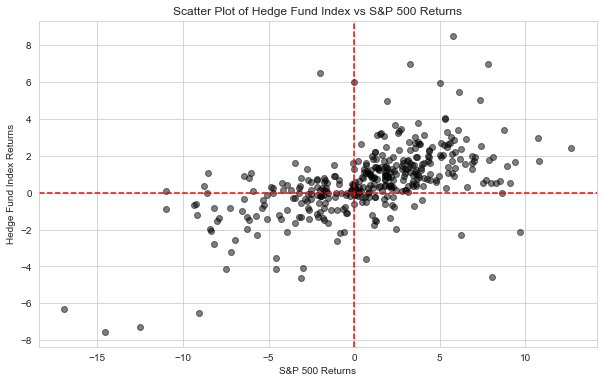

In [25]:
# Scatter plot of HF Index vs S&P 500
plt.figure(figsize=(10, 6))
plt.scatter(returns['GSPC'], returns['Credit Suisse Hedge Fund Index '], alpha=0.5, color='black')
plt.axvline(0, color="red", linestyle="--")
plt.axhline(0, color="red", linestyle="--")
plt.title("Scatter Plot of Hedge Fund Index vs S&P 500 Returns")
plt.xlabel("S&P 500 Returns")
plt.ylabel("Hedge Fund Index Returns")
plt.grid(True)
plt.show()

In [26]:
# 1. Prepare the data
X = returns['GSPC']
X = sm.add_constant(X) # Add a constant term (intercept) to the predictor
y = returns['Credit Suisse Hedge Fund Index ']

# 2. Fit the OLS model
model_lin = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags':1})

# 3. Print the standard summary (homoskedastic/uncorrelated assumption)
print("\n=== OLS Results (HAC/ Newey-West Standard Errors) ===")
print(model_lin.summary())




=== OLS Results (HAC/ Newey-West Standard Errors) ===
                                   OLS Regression Results                                  
Dep. Variable:     Credit Suisse Hedge Fund Index    R-squared:                       0.349
Model:                                         OLS   Adj. R-squared:                  0.347
Method:                              Least Squares   F-statistic:                     90.34
Date:                             Mon, 17 Feb 2025   Prob (F-statistic):           2.60e-19
Time:                                     21:41:59   Log-Likelihood:                -681.01
No. Observations:                              372   AIC:                             1366.
Df Residuals:                                  370   BIC:                             1374.
Df Model:                                        1                                         
Covariance Type:                               HAC                                         
                 coef    

Before introducing non-linearities, let’s estimate a linear model in which the HF index return is explained by the S&P 500 return. The results below show the existence of a statistically significant relationship between the two returns. The exposure of the HF return to S&P 500 fluctuations is 0.25 which means that if the market return changes by  ±1% then we expect the fund return to change by  ±0.25%. 

The  $R^2$ of the regression is 0.35, which is not very high for this type of regressions. A (relatively) low $R^2$ in this case is actually good news for hedge funds since most strategies promise to provide low (if none) exposure to market fluctuation. If this is case then a low goodness-of-fit statistic is good news. 

We can add the fitted linear relationship given by $ 0.3972 + 0.2546 R_t{GSPC}$ to the previous scatter plot to have a graphical understanding of the LRM:

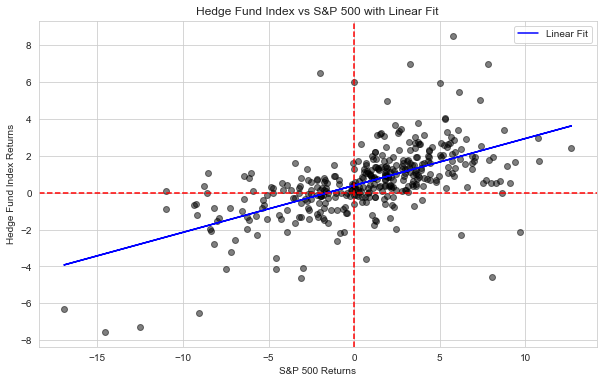

In [27]:
# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(returns['GSPC'], returns['Credit Suisse Hedge Fund Index '], alpha=0.5, color='black')
plt.plot(returns['GSPC'], model_lin.fittedvalues, color='blue', label='Linear Fit')
plt.axvline(0, color="red", linestyle="--")
plt.axhline(0, color="red", linestyle="--")
plt.title("Hedge Fund Index vs S&P 500 with Linear Fit")
plt.xlabel("S&P 500 Returns")
plt.ylabel("Hedge Fund Index Returns")
plt.legend()
plt.grid(True)
plt.show()

To estimate a quadratic model we need to add the quadratic term to the linear regression.

In [28]:
# Quadratic regression model
returns['GSPC_squared'] = returns['GSPC'] ** 2
X_quad = sm.add_constant(returns[['GSPC', 'GSPC_squared']])
model_quad = sm.OLS(y, X_quad).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model_quad.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Credit Suisse Hedge Fund Index    R-squared:                       0.369
Model:                                         OLS   Adj. R-squared:                  0.365
Method:                              Least Squares   F-statistic:                     57.35
Date:                             Mon, 17 Feb 2025   Prob (F-statistic):           2.05e-22
Time:                                     21:41:59   Log-Likelihood:                -675.37
No. Observations:                              372   AIC:                             1357.
Df Residuals:                                  369   BIC:                             1368.
Df Model:                                        2                                         
Covariance Type:                               HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]

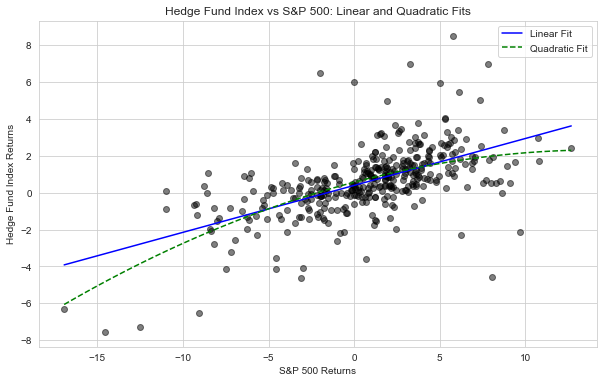

In [29]:
# Plot linear vs quadratic fit
GSPC_range = np.linspace(returns['GSPC'].min(), returns['GSPC'].max(), 100)
linear_fit = model_lin.params[0] + model_lin.params[1] * GSPC_range
quadratic_fit = model_quad.params[0] + model_quad.params[1] * GSPC_range + model_quad.params[2] * GSPC_range ** 2

plt.figure(figsize=(10, 6))
plt.scatter(returns['GSPC'], returns['Credit Suisse Hedge Fund Index '], alpha=0.5, color='black')
plt.plot(GSPC_range, linear_fit, color='blue', label='Linear Fit')
plt.plot(GSPC_range, quadratic_fit, color='green', linestyle='--', label='Quadratic Fit')
plt.title("Hedge Fund Index vs S&P 500: Linear and Quadratic Fits")
plt.xlabel("S&P 500 Returns")
plt.ylabel("Hedge Fund Index Returns")
plt.legend()
plt.grid(True)
plt.show()

Based on the regression output:

Since the coefficient of the squared term (GSPC_squared) is statistically significant at the 5% level (p = 0.01), we conclude that a nonlinear model provides a better explanation of the relationship between hedge fund returns and market returns. The negative coefficient (-0.0086) indicates that the relationship follows a concave pattern.

The marginal effect of a 1% change in the S&P 500 return is given by:

$$  0.2458+(−0.0086)  \times GSPC_t $$

This suggests that the sensitivity of hedge fund returns to market returns decreases as market returns increase in magnitude.

Since the quadratic coefficient is negative, the implied parabola

$$  0.5717+0.2458 \times GSPC_t - 0.0086×(GSPC_t) ^ 2  $$ 

lies below the linear approximation

$$ 0.5717+0.2458 \times GSPC_t  $$

This means that for large absolute market returns (both positive and negative), hedge fund returns are expected to be lower than what a linear model would predict. Conversely, if the quadratic coefficient were positive, the parabola would lie above the line, suggesting hedge funds become less sensitive or even benefit from extreme market movements.

## 3.4 The role of outliers
One of the strategies provided by Credit Suisse is the equity market neutral strategy that aims at providing positive expected return, with low volatility and no correlation with the equity market. 

Figure below represents a scatter plot of the market return (proxied by the S&P 500) and the HF equity market neutral return.

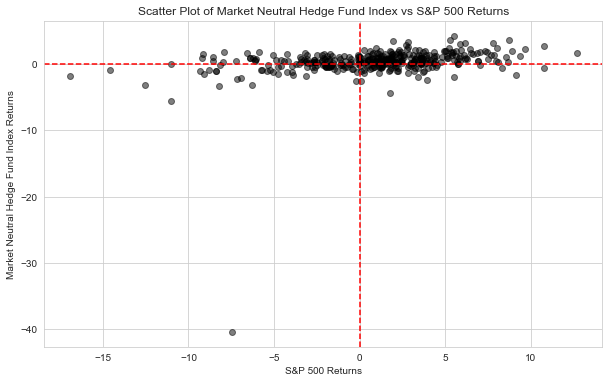

In [30]:
# Scatter plot of HF Index vs S&P 500
plt.figure(figsize=(10, 6))
plt.scatter(returns['GSPC'], returns['Credit Suisse Equity Market Neutral Hedge Fund Index'], alpha=0.5, color='black')
plt.axvline(0, color="red", linestyle="--")
plt.axhline(0, color="red", linestyle="--")
plt.title("Scatter Plot of Market Neutral Hedge Fund Index vs S&P 500 Returns")
plt.xlabel("S&P 500 Returns")
plt.ylabel("Market Neutral Hedge Fund Index Returns")
plt.grid(True)
plt.show()

What is wrong with the figure? Did we do a mistake in plotting the variables? No, the only issue with the graph is the large negative return of -40.45% for the HF strategy relative to a loss for the S&P 500 of “only” 7.48%. To find out when the extreme observation occurred, we can use the following Python command:

In [31]:
id= np.argmin(returns['Credit Suisse Equity Market Neutral Hedge Fund Index'])
returns.iloc[id][['Credit Suisse Equity Market Neutral Hedge Fund Index', 'GSPC']]

0
Credit Suisse Equity Market Neutral Hedge Fund Index   -40.452954
GSPC                                                    -7.484904
Name: 2008-11-30 00:00:00, dtype: float64

What happened in November 2008 to create a loss of 40.45% to an aggregate index of market neutral strategy hedge funds? According to a Credit Suisse press release, they marked the assets of the Kingate Global Fund down to zero. This fund, based in the British Virgin Islands, acted as a feeder for Madoff's funds and was completely wiped out when Bernard Madoff’s Ponzi scheme was exposed.

Does this extreme outlier affect our conclusions and evaluation of the equity market neutral strategy? To assess its impact, we can examine how the descriptive statistics would change if this outlier were excluded.

- the mean would increase from 0.37% to 0.48%
- the standard deviation would decline from 2.43% to 1.19%
- the skewness would change from -12.80 to -0.61
- the excess kurtosis would change from 211.87 to 2.72

In [32]:
# Removing the outlier (assuming the 179th observation is the outlier)
returns_no_outlier = returns.drop(returns.index[178])

# Descriptive statistics WITHOUT the outlier
mean_without_outlier = returns_no_outlier['Credit Suisse Equity Market Neutral Hedge Fund Index'].mean()
std_without_outlier = returns_no_outlier['Credit Suisse Equity Market Neutral Hedge Fund Index'].std()
skew_without_outlier = skew(returns_no_outlier['Credit Suisse Equity Market Neutral Hedge Fund Index'])
excess_kurtosis_without_outlier = kurtosis(returns_no_outlier['Credit Suisse Equity Market Neutral Hedge Fund Index'])

print("Descriptive Statistics WITHOUT the outlier:")
print(f"Mean: {mean_without_outlier:.2f}")
print(f"Standard Deviation: {std_without_outlier:.2f}")
print(f"Skewness: {skew_without_outlier:.2f}")
print(f"Excess Kurtosis: {excess_kurtosis_without_outlier:.2f}")


Descriptive Statistics WITHOUT the outlier:
Mean: 0.48
Standard Deviation: 1.19
Skewness: -0.61
Excess Kurtosis: 2.72


These results make clear that there is a significant effect of the outlier in distorting the descriptive statistics. Statistically speaking, the estimates might be biased because the outlier has the effect of pushing away the sample estimates from their population values. This is an important issue in practice because we use these quantities to compare the risk-return tradeoff of different assets and also because we wish to predict the expected future return from investing in such a strategy. Should we include or exclude the outlier when calculating quantities that are the basis for investment decisions? This choice depends on our interpretation of the nature of the extreme observation: is it an intrinsic feature of the process to produce outliers occasionally or can it be attributed to a one-time event that is unlikely to happen again? In the current situation we need to assess whether another Ponzi scheme of the magnitude operated by Bernard Madoff can occur in the future and lead to the liquidation of a large equity market neutral hedge fund. It is probably fair to say that the circumstances that led to the 51.84% loss were so exceptional that it is warranted to simply drop that observation from the sample when estimating the model parameters.

In addition to creating bias in the descriptive statistics, outliers have also the potential to bias the coefficient estimates of the LRM. The code below shows the estimation results for the model

$$R_{t}^{EMN} = \beta_0 + \beta_1 \cdot R_{t}^{s\&p500} +\varepsilon_t $$

Where $R_{t}^{EMN}$ and $R_{t}^{s\&p500}$ are the returns of the equity market neutral and S&P 500 returns. The first regression model includes all observations while the second drops the outlier:
print(returns.shape)
print(returns_no_outlier.shape)

In [33]:
# 1. Prepare the data
X = returns['GSPC']
X = sm.add_constant(X) # Add a constant term (intercept) to the predictor
y = returns['Credit Suisse Equity Market Neutral Hedge Fund Index']

# 2. Fit the OLS model
model_lin = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags':1})

# 3. Print the standard summary (homoskedastic/uncorrelated assumption)
print("\n=== OLS Results (HAC/ Newey-West Standard Errors) ===")
print(model_lin.summary())


=== OLS Results (HAC/ Newey-West Standard Errors) ===
                                             OLS Regression Results                                             
Dep. Variable:     Credit Suisse Equity Market Neutral Hedge Fund Index   R-squared:                       0.079
Model:                                                              OLS   Adj. R-squared:                  0.077
Method:                                                   Least Squares   F-statistic:                     10.33
Date:                                                  Mon, 17 Feb 2025   Prob (F-statistic):            0.00142
Time:                                                          21:42:00   Log-Likelihood:                -842.62
No. Observations:                                                   372   AIC:                             1689.
Df Residuals:                                                       370   BIC:                             1697.
Df Model:                                

In [34]:
# 1. Prepare the data
X = returns_no_outlier['GSPC']
X = sm.add_constant(X) # Add a constant term (intercept) to the predictor
y = returns_no_outlier['Credit Suisse Equity Market Neutral Hedge Fund Index']

# 2. Fit the OLS model
model_lin_without_outlier = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags':1})

# 3. Print the standard summary (homoskedastic/uncorrelated assumption)
print("\n=== OLS Results Without Outlier (HAC/ Newey-West Standard Errors) ===")
print(model_lin_without_outlier.summary())


=== OLS Results Without Outlier (HAC/ Newey-West Standard Errors) ===
                                             OLS Regression Results                                             
Dep. Variable:     Credit Suisse Equity Market Neutral Hedge Fund Index   R-squared:                       0.161
Model:                                                              OLS   Adj. R-squared:                  0.158
Method:                                                   Least Squares   F-statistic:                     43.46
Date:                                                  Mon, 17 Feb 2025   Prob (F-statistic):           1.50e-10
Time:                                                          21:42:00   Log-Likelihood:                -557.74
No. Observations:                                                   371   AIC:                             1119.
Df Residuals:                                                       369   BIC:                             1127.
Df Model:                

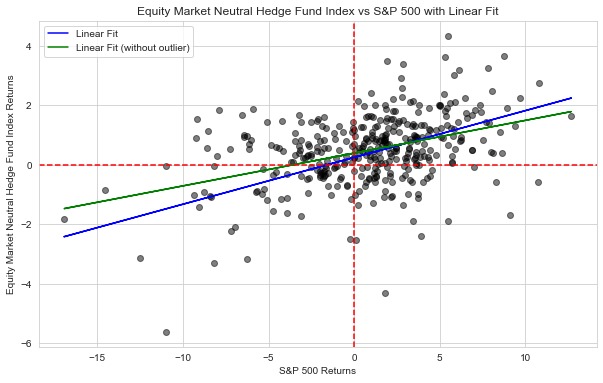

In [35]:
# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(returns_no_outlier['GSPC'], returns_no_outlier['Credit Suisse Equity Market Neutral Hedge Fund Index'], alpha=0.5, color='black')
plt.plot(returns['GSPC'], model_lin.fittedvalues, color='blue', label='Linear Fit')
plt.plot(returns_no_outlier['GSPC'], model_lin_without_outlier.fittedvalues, color='green', label='Linear Fit (without outlier)')
plt.axvline(0, color="red", linestyle="--")
plt.axhline(0, color="red", linestyle="--")
plt.title("Equity Market Neutral Hedge Fund Index vs S&P 500 with Linear Fit")
plt.xlabel("S&P 500 Returns")
plt.ylabel("Equity Market Neutral Hedge Fund Index Returns")
plt.legend()
plt.grid(True)
plt.show()

##  3.5 LRM with multiple independent variables

In practice, we might be interested to include more than just one variable to explain the dependent variable $Y$ Denote the $K$ independent variables that we are interested to include in the regression by $X_{k,t}$ for $k = 1,...,K$.The linear regression with multiple regressors is defined as

$$
Y_t = \beta_0 + \beta_1 X_{1,t} + ... + \beta_K X_{K,t} + \varepsilon_t
$$

Also in this case we can use OLS to estimate the parameters $\beta_k$ (for $k = 1, ... , K$) by choosing the values that minimize the sum of the squared residuals. Care should be given to the correlation among the independent variables to avoid cases of extremely high dependence. The case of correlation among two independent variables equal to 1 is called perfect collinearity and the model cannot be estimated. This is because it is not possible to associate changes in $Y_t$ with changes in $X_{1,t}$ or $X_{2,t}$ since the two independent variables have correlation one and move in the same direction and by a proportional amount. A similar situation arises when an independent variable has correlation 1 with a linear combination of the independent variables. The solution in this case is to exclude one of the variables from the regression. In practice, it is more likely to happen that the regressors have very high correlation although not equal to 1. In this case the model can be estimated but the coefficient estimates become unreliable. For example, equity markets move together in response to news that affect the economies worldwide. So, there are significant co-movements among these markets and thus high correlation which can become problematic in some situations. Before estimating the LRM, the correlation between the independent variables should be estimated to evaluate whether there are high correlations that might make impossible or unreliable to estimate the model. Correlations are high when they are larger than 0.85 and you should start assessing if these variables are both needed in the regression.

A practical way to assess the effect of these correlations is to estimate the LRM with both variables, and then excluding one of them and including the other. By comparing the adjusted $R^2$ and the stability of the coefficient estimates and the standard errors should give an answer whether it is the case to include both or just one of the variables. 

To illustrate the LRM with multiple regressors I will extend the earlier market model to a 3-factor model in which there are two more independent variables or factors to explain the variation over time of the returns of a portfolio. The factors are called the Fama-French factors after the two economists that first proposed these factors to model risk in portfolios. In addition to the market return (MKT), they construct two additional risk factors:

- **Small minus Big (SMB)** which is defined as the difference between the return of a portfolio of small capitalization stocks and a portfolio of large capitalization stocks. The aim of this factor is to capture the premium from investing in small cap stocks.

- **High minus Low (HML)** is obtained as the difference between a portfolio of high Book-to-Market (B-M) ratio stocks and a portfolio of low B-M stocks. The high B-M ratio stocks are also called value stocks while the low B-M ratio ones are referred to as growth stocks. The factor provides a proxy for the premium from investing in value relative to growth stocks.


More details about the construction of these factors are available at [Ken French webpage](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) where you can also download the data for the MKT, SMB, and HML factors and the risk-free rate (RF). The dataset starts in July 1926 and figure below shows the time series plot of the 3 factors and the risk-free rate.


In [36]:

data = pd.read_excel('F-F_Research_Data_Factors.xlsx', parse_dates=['Date'], index_col='Date')
data

,Mkt-RF,SMB,HML,RF
Date,,,,
192607,2.96,-2.56,-2.43,0.22
192608,2.64,-1.17,3.82,0.25
192609,0.36,-1.40,0.13,0.23
192610,-3.24,-0.09,0.70,0.32
192611,2.53,-0.10,-0.51,0.31
...,...,...,...,...
201609,0.25,2.12,-1.24,0.02
201610,-2.02,-4.40,4.09,0.02
201611,4.86,5.71,8.21,0.01


In [37]:
data = data.rename(columns={'Mkt-RF': 'MKT'})
data.corr()

,MKT,SMB,HML,RF
MKT,1.000000,0.317668,0.245633,-0.065020
SMB,0.317668,1.000000,0.122165,-0.052655
HML,0.245633,0.122165,1.000000,0.018513
RF,-0.065020,-0.052655,0.018513,1.000000


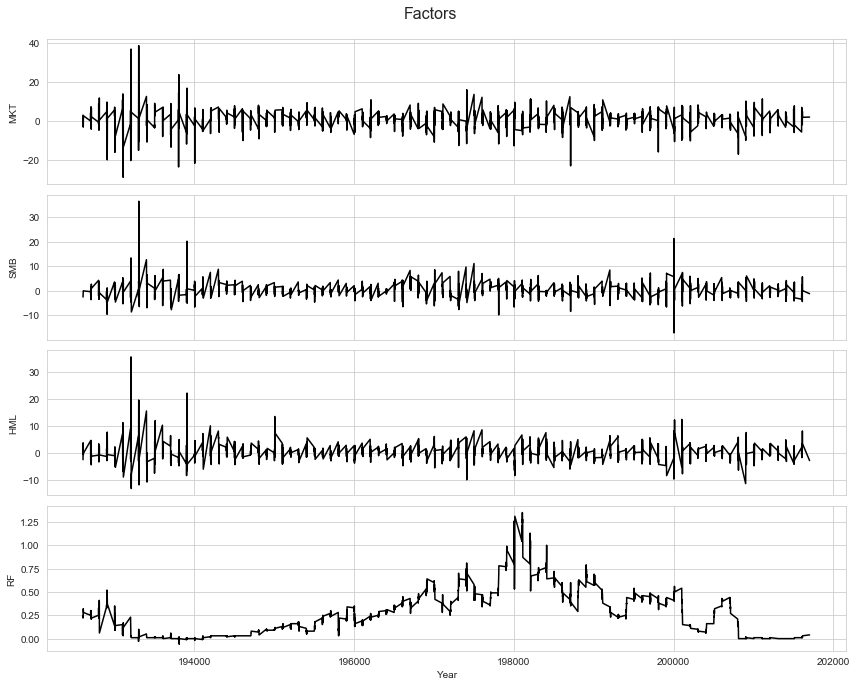

In [38]:
# Plotting the factors
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot MKT
axs[0].plot(data.index, data['MKT'], color='black')
axs[0].set_ylabel('MKT')

# Plot SMB
axs[1].plot(data.index, data['SMB'], color='black')
axs[1].set_ylabel('SMB')

# Plot HML
axs[2].plot(data.index, data['HML'], color='black')
axs[2].set_ylabel('HML')

# Plot RF
axs[3].plot(data.index, data['RF'], color='black')
axs[3].set_ylabel('RF')

# Common X label
axs[3].set_xlabel('Year')

# Set a common title
fig.suptitle('Factors', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

The average monthly MKT return from 1926 to 2017 has been 0.65% in excess of the risk-free rate. The average of SMB is 0.21% and represents the monthly premium deriving from investing in small capitalization relative to large capitalization stocks. The sample average of HML is 0.4% which measures the premium from investing in value stocks (high book-to-market ratio) relative to growth stocks (low book-to-market ratio). The standard deviation of MKT, SMB, and HML factors are 5.37%, 3.21%, and 3.5%, respectively.

In [39]:
# Compute summary statistics
stats_data = pd.DataFrame({
    'Mean': data.mean(),
    'Std Dev': data.std(),
    'Skewness': data.apply(skew),
    'Kurtosis': data.apply(kurtosis),
    'Max': data.max(),
    'Min': data.min()
})

stats_data
stats_data.style.format("{:.2f}")

,Mean,Std Dev,Skewness,Kurtosis,Max,Min
MKT,0.65,5.37,0.19,7.79,38.85,-29.13
SMB,0.21,3.20,1.89,19.14,36.56,-17.20
HML,0.39,3.52,2.31,20.19,35.61,-13.11
RF,0.28,0.25,1.06,1.25,1.35,-0.06


Another statistic that is useful to estimate is the correlation between the factors that allows us to measure their dependence. We can calculate the correlation matrix using the corr() function that was introduced earlier.


In [40]:
data.corr().round(2)

,MKT,SMB,HML,RF
MKT,1.00,0.32,0.25,-0.07
SMB,0.32,1.00,0.12,-0.05
HML,0.25,0.12,1.00,0.02
RF,-0.07,-0.05,0.02,1.00


The correlation matrix is a table that shows the pair-wise correlation between the variable in the row and the one in the column. The numbers in the diagonal are all equal to 1 because they represent the correlation of a factor with itself. The correlation estimates show that SMB and HML are correlated to the MKT returns (0.32 and 0.25, respectively) and also among each other (0.12). In this sense, it seems that the factors capture moderately correlated sources of risk which can be valuable from a diversification stand-point.

### 3.5.1 Size portfolios

Financial economics has devoted lots of energy to understand the factors driving asset prices and their expected returns. On the way, many anomalies have emerged in the sense of empirical facts that did not align with a theory. In this case the theory is the Capital Asset Pricing Model (CAPM) which states that the expected return of an asset should be proportial to the exposure to systematic risk measure by the excess market return relative to the risk-free rate of return.If we denote by $ R_t^{i}$ the excess return of asset $i$ in period $t$ and by $R_t^{MKT}$ the excess market return in the same period, the CAPM predicts that

$$
 R_{t}^{i} = \alpha + \beta R_t^{MKT} + \varepsilon_t
$$

where the intercept $\alpha$ in the theory should be equal to zero and the slope $\beta$ measures the exposure of the asset to market risk. Let’s consider an application. The data library in [Ken French webpage](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) provides historical data for the returns of portfolio of stocks formed based on their market capitalization. The way these portfolio are constructed is by sorting once a year all the stocks listed in the NYSE, AMEX, and NASDAQ from the largest capitalization to the smallest and then creating portfolios that invest in a fraction of these stocks. The French dataset forms size portfolios as follows:

- 3 portfolios: the 30% of smallest capitalization, the 30% of largest, and the 40% of medium capitalization
- 5 portfolios: lowest 20%, largest 20%, and 20% interval between the smallest and largest (quintiles)
- 10 portfolios: divide the sample at intervals of 10% (deciles)


This process can be interpreted as a mutual fund that once a year (typically in June) forms a portfolio of stocks based on their market capitalization and keeps that allocation for one year. First, let’s consider the 10 decile portfolios and calculate the average return over the period 1926-2017:

In [41]:
port_size = pd.read_excel('Portfolios_Formed_on_ME.xlsx')
port_size = port_size.rename(columns={'Mkt-RF': 'MKT'})
port_size 

,Unnamed: 0,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,...,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,192607,-99.99,0.14,1.54,3.42,0.37,0.48,1.68,1.41,3.67,...,-0.34,0.30,-0.27,0.60,1.17,1.67,1.40,1.07,3.31,3.49
1,192608,-99.99,3.19,2.73,2.91,2.21,3.58,3.70,1.50,3.07,...,0.88,2.30,3.75,3.07,2.51,4.16,1.29,1.24,0.36,3.54
2,192609,-99.99,-1.73,-0.88,0.80,-1.39,-1.25,0.07,-0.23,0.81,...,0.36,-2.23,-2.24,-1.00,-0.24,-0.10,-2.16,0.51,-1.00,1.02
3,192610,-99.99,-2.94,-3.26,-2.79,-2.56,-3.99,-2.65,-3.36,-2.74,...,-4.61,-2.33,-3.57,-4.77,-3.34,-2.71,-3.87,-3.58,-3.68,-2.88
4,192611,-99.99,-0.38,3.73,2.74,-0.95,3.03,3.50,3.25,2.71,...,-3.59,-0.54,-0.23,4.59,3.25,3.14,3.29,2.74,3.55,2.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,201707,-99.99,-0.41,1.25,2.12,-1.16,0.85,1.11,1.44,2.18,...,-1.29,-1.20,0.39,1.08,1.08,1.01,1.39,1.36,1.96,2.14
1093,201708,-99.99,-1.40,-1.10,0.49,-1.43,-2.10,-1.07,-0.23,0.54,...,-1.92,-1.27,-1.45,-2.77,-1.34,-1.03,-0.59,-0.16,-1.39,0.80
1094,201709,-99.99,8.05,5.15,2.11,8.69,7.55,5.20,3.86,1.96,...,9.12,8.27,7.24,7.62,6.50,4.11,4.01,3.62,2.24,1.81
1095,201710,-99.99,-0.02,1.70,2.49,-0.29,0.26,1.65,2.11,2.54,...,-1.16,0.12,0.19,0.16,0.50,2.33,2.27,1.88,1.49,2.63


In [42]:

port10 = ["Lo 10", "Dec 2", "Dec 3", "Dec 4", "Dec 5", 
          "Dec 6", "Dec 7", "Dec 8", "Dec 9", "Hi 10"]

# Subset the DataFrame to only include the selected portfolios
size10 = port_size[port10]

# Calculate the average return and standard deviation for each portfolio
table_size10 = pd.DataFrame({
    'AV RET': size10.mean(),
    'STD DEV': size10.std()
})

# Display the table with three decimal digits
print(f"Average return and standard deviation of the decile portfolios sorted by size.\n\n{table_size10.round(3)}")

Average return and standard deviation of the decile portfolios sorted by size.

       AV RET  STD DEV
Lo 10   1.116    9.913
Dec 2   0.990    8.738
Dec 3   0.983    7.938
Dec 4   0.946    7.455
Dec 5   0.892    7.034
Dec 6   0.908    6.796
Dec 7   0.834    6.404
Dec 8   0.806    6.128
Dec 9   0.736    5.791
Hi 10   0.613    5.042


The results in the table above show that, historically, portfolios of small caps have provided significantly higher returns relative to portfolios of large caps. A portfolio that consistently invested in the 10% of smaller caps earned an average monthly return of 1.116% relative to the portfolio of the largest companies that earned 0.613%. Why is the expected return of small caps portfolios higher relative to the larger caps? Is it because they are more risky? This is definitely the case since the standard deviation of the smallest cap portfolio is 9.913% relative to the 5.042% of the largest cap portfolio. Why is the standard deviation higher for small caps? do we want to look for an explanation to both? The CAPM model predicts that stocks or portfolios that are more exposed to systematic risk (high $\beta$) are riskier and receive compensation in the form of higher expected returns. Let’s estimate the CAPM model in the previous Equation to the 10 size portfolios and, if the CAPM is correct, we should find that $\beta$ s decline moving from the 1st decile portfolio to the 10th portfolio and that $\alpha$ s are close to zero.

In [43]:
X = port_size[['MKT']]
X = sm.add_constant(X)  # Add a constant for the intercept

# Run the CAPM regression for each portfolio
capm_results = {}
for portfolio in size10.columns:
    y = size10[portfolio]
    model = sm.OLS(y, X).fit()
    capm_results[portfolio] = model.params

# Convert the results to a DataFrame and display with three decimal digits
capm_df = pd.DataFrame(capm_results).T.round(3)
print(capm_df)

       const    MKT
Lo 10  0.177  1.418
Dec 2  0.070  1.388
Dec 3  0.105  1.326
Dec 4  0.109  1.263
Dec 5  0.078  1.227
Dec 6  0.108  1.207
Dec 7  0.073  1.149
Dec 8  0.068  1.114
Dec 9  0.031  1.064
Hi 10 -0.003  0.931


The estimates of the slope coefficients in above table show, as expected, that smaller caps have higher betas relative to portfolios of large cap stocks (1.42 vs 0.93). This explains the fact that portfolios with more exposure to small caps are more volatile and provide higher expected returns relative to portfolios with predominantly larger stocks. What about the intercepts or alpha? The CAPM model predicted that these coefficients should be equal to zero, but a first assessment of the estimates does not seem to confirm this. 

The first portfolio has an estimate of $\alpha$ of 0.19 which, from the perspective of monthly returns, is a considerable number. However, a proper assessment of the hypothesis that $\alpha = 0 $ should account for the standard errors of the estimates and perform a statistical test of the hypothesis against the alternative that the intercept is different from zero. The CAPM model also implies that the expected return of the portfolios, $E(R_t^{i})$, is given by the sum of $\alpha$ and the compensation for exposure to market risk, $\beta R_{t}^{MKT}$. We now visualize the contribution of each component of the expected return.

The bar plot of the average return of the decile portfolios sorted on size together with the estimated intercept (alpha). The horizontal line represents the average MKT return.

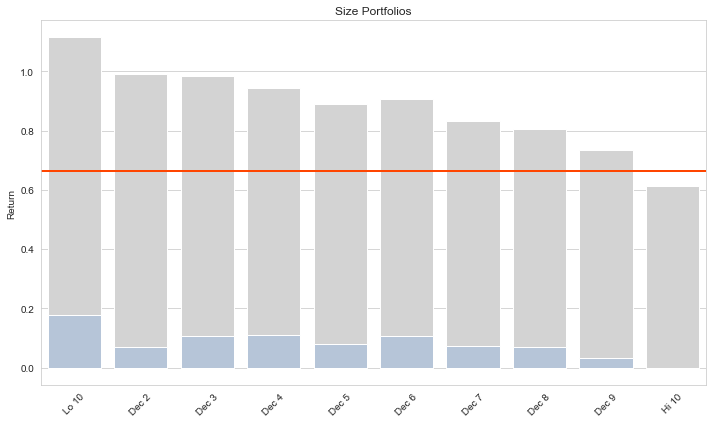

In [44]:
size10_stat = pd.DataFrame({
    'PORT': size10.columns,
    'AVRET': size10.mean(),
    'ALPHA': capm_df['const'],
    'BETA': capm_df['MKT']
})

# Plot the bar chart to resemble the provided style
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='PORT', y='AVRET', data=size10_stat, color='lightgrey')
sns.barplot(x='PORT', y='ALPHA', data=size10_stat, color='lightsteelblue')
plt.axhline(y=port_size['MKT'].mean(), color='orangered', linewidth=2)
plt.title('Size Portfolios')
plt.xlabel('')
plt.ylabel('Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The figure above shows that the CAPM model explains a significant component of the average return of the portfolios, but there is still between 10-20% of the return that is attributed to alpha. As we said before, it could be that these intercepts are not estimated very precisely so that statistically they are not different from zero. To evaluate this hypothesis we need to obtain the standard errors or the t-statistic from all the portfolios.  

In [45]:
X = port_size[['MKT']]
X = sm.add_constant(X)  # Add a constant for the intercept

# Run the CAPM regression for each portfolio
capm_summary = {}
for portfolio in size10.columns:
    y = size10[portfolio]
    model = sm.OLS(y, X).fit()
    capm_summary[portfolio] = model.summary()

print(capm_summary['Lo 10']) 
#print(capm_summary)    


                            OLS Regression Results                            
Dep. Variable:                  Lo 10   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1539.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          6.76e-211
Time:                        21:42:02   Log-Likelihood:                -3591.1
No. Observations:                1097   AIC:                             7186.
Df Residuals:                    1095   BIC:                             7196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1768      0.195      0.909      0.3

In [46]:
capm_summary['Lo 10'].tables[1].data[1][3]

'    0.909'

In [47]:
# Extract the t-statistic of the intercept for each portfolio
capm_tstat = {portfolio: summary.tables[1].data[1][3] for portfolio, summary in capm_summary.items()}

capm_tstat_df = pd.DataFrame([capm_tstat])

capm_tstat_df 

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,0.909,0.501,0.961,1.127,1.011,1.659,1.316,1.535,0.911,-0.139


Since all t-statistics are smaller than 1.96 we do not reject the null hypothesis that the  $\alpha = 0$ for each of these 10 portfolios at 5% significance level, while at 10% significance only the intercept for the 6th decile is significant. Let’s also extract from the regression results the adjusted  $R^2$ of the regression and the standard error of regression. In the code below, I also bind the standard deviation of each portfolio return so that we can access the magnitude of the variables.

In [48]:
# Extract the adjusted R-squared for each portfolio
capm_adj_r2 = {portfolio: summary.tables[0].data[1][3] for portfolio, summary in capm_summary.items()}

capm_adj_r2_df = pd.DataFrame([capm_adj_r2])

capm_adj_r2_df

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,0.584,0.721,0.797,0.820,0.869,0.901,0.920,0.944,0.964,0.973


The first portfolio is twice more volatile relative to the last portfolio and the CAPM model contributes to explain most of its variability (adjusted  $R^2$ of 0.97), but only 0.58 for Lo 1027. This suggests that the small cap portfolios could benefit from adding additional risk factors that might explain some of the unexplained variation of the returns and so improve  $R^2$.

The CAPM model predicts that the portfolio return should be explained by just one factor, the market return. This assumption might work for some portfolios, but it seems that it has some difficulties explaining the return of portfolios in which small cap stocks are predominant. Fama and French (1993) proposed a 3-factor model that add SMB and HML to the MKT factor given by 

 $$
        R^i_t = \alpha + \beta_{MKT} R_t^{MKT} + \beta_{SMB} R_t^{SMB} + \beta_{HML} R_t^{HML} + \epsilon_t
$$

Let’s see how the results would change if we estimate the 3-factor model on the size portfolios:

In [49]:
X = port_size[['MKT','SMB','HML']]
X = sm.add_constant(X)  # Add a constant for the intercept

# Run the  Fama and French regression for each portfolio
factors_results = {}
factors_summary = {}
for portfolio in size10.columns:
    y = size10[portfolio]
    model = sm.OLS(y, X).fit()
    factors_results[portfolio] = model.params
    factors_summary[portfolio] = model.summary()

# Convert the results to a DataFrame and display with three decimal digits
factors_df = pd.DataFrame(factors_results).T.round(3)
print(factors_df)

       const    MKT    SMB    HML
Lo 10 -0.163  0.999  1.548  0.786
Dec 2 -0.166  1.068  1.275  0.490
Dec 3 -0.079  1.075  1.008  0.376
Dec 4 -0.050  1.045  0.881  0.320
Dec 5 -0.034  1.059  0.724  0.197
Dec 6  0.006  1.077  0.494  0.228
Dec 7  0.003  1.050  0.408  0.136
Dec 8  0.016  1.051  0.229  0.121
Dec 9 -0.005  1.033  0.065  0.112
Hi 10  0.023  0.977 -0.215 -0.034


In [50]:
#factors_summary

The results in above table shows that:

- the estimated alpha are mostly negative
- the exposure to market risk (market beta) is very close to 1 for all portfolios and significantly smaller for the low decile portfolios relative to the CAPM regression (the beta for the first portfolio decreases from 1.42 to 1).
- The loading on the SMB for the low decile portfolios is large and positive and decreases until it becomes negative for the last decile portfolios. This is expected since the low portfolios have a larger exposure to small caps and thus benefit from the risk premium of small caps.
- Although we are not sorting stocks based on the book-to-market ratio but only on size, the loading on the HML factor is positive and large at low quantiles and decreases to approximately zero for the portfolio of largest cap stocks. This indicates the out-performance of the small caps portfolios is partly due also to a book-to-market effect, in the sense that small stocks are more likely to be value stocks and the regression is able to distinguish the component of the return that is due to the size effect and the part that is due to the value effect.

In [51]:
# Extract the t-statistic of the intercept for each portfolio
factors_tstat = {portfolio: summary.tables[1].data[1][3] for portfolio, summary in factors_summary.items()}

factors_tstat_df = pd.DataFrame([factors_tstat])

factors_tstat_df 

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,-1.646,-3.141,-2.142,-1.366,-1.069,0.152,0.074,0.443,-0.178,1.546


In [52]:
# Extract the adjusted R-squared for each portfolio
factors_adj_r2 = {portfolio: summary.tables[0].data[1][3] for portfolio, summary in factors_summary.items()}

# Convert to a DataFrame for better readability
factors_adj_r2_df = pd.DataFrame([factors_adj_r2])

factors_adj_r2_df

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,0.893,0.961,0.977,0.975,0.979,0.965,0.964,0.962,0.970,0.991


In [53]:
# Combine the two DataFrames by concatenating them with custom row names
combined_df = pd.concat([capm_adj_r2_df, factors_adj_r2_df], ignore_index=True)

# Add row labels
combined_df.index = ['CAPM', '3-FACTOR']

# Display the combined DataFrame
combined_df

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
CAPM,0.584,0.721,0.797,0.820,0.869,0.901,0.920,0.944,0.964,0.973
3-FACTOR,0.893,0.961,0.977,0.975,0.979,0.965,0.964,0.962,0.970,0.991


In addition, the comparison in above table  of the adjusted  R2 for the CAPM and 3-factor model indicates that the largest improvements in goodness-of-fit occur for the lowest decile portfolios, while for the top decile portfolios the improvement is marginal.

### 3.5.2 Book-to-Market Ratio Portfolios

In [54]:
port_value = pd.read_excel('Portfolios_Formed_on_BE-ME.xlsx')
port_value = port_value.rename(columns={'Mkt-RF': 'MKT'})
port_value

,Unnamed: 0,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,...,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,192607,12.07,5.55,1.86,1.54,3.18,5.41,1.78,2.41,0.60,...,4.41,1.00,11.16,1.46,1.28,1.90,2.18,2.23,0.41,0.30
1,192608,-9.73,2.65,2.67,5.61,1.00,4.01,2.05,4.59,7.10,...,-0.10,1.94,6.14,2.13,1.33,2.37,4.52,3.92,8.06,3.67
2,192609,-15.16,1.28,0.07,-0.71,-1.04,3.04,-0.29,-0.19,-1.46,...,-0.34,-2.55,6.07,0.50,-1.12,0.17,-0.51,-0.19,-2.39,0.21
3,192610,-5.63,-3.60,-2.41,-3.55,-2.89,-2.96,-2.20,-4.20,-4.28,...,-4.10,-1.99,-5.33,-1.73,-2.63,-2.39,-5.09,-3.16,-5.78,-1.49
4,192611,5.58,3.13,2.95,2.94,4.12,2.56,1.90,3.96,2.48,...,5.72,1.20,0.79,3.32,1.66,1.50,3.89,3.08,2.46,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,201707,0.00,2.41,1.57,1.97,2.37,2.02,1.37,2.02,2.16,...,1.98,2.66,2.44,1.38,1.84,0.77,2.36,1.68,2.40,1.65
1093,201708,-0.30,1.23,-0.27,-1.28,1.88,-0.03,-0.72,-0.50,-1.93,...,0.42,3.29,-0.50,0.33,-0.14,-1.50,-0.58,-0.60,-1.64,-2.57
1094,201709,0.77,1.50,3.09,5.06,1.39,1.80,4.40,3.68,5.42,...,2.18,0.36,1.69,1.72,3.97,4.64,2.12,4.56,4.96,5.87
1095,201710,-0.34,3.02,1.44,2.68,3.90,1.06,2.03,0.88,3.68,...,2.75,4.97,0.72,1.25,4.66,-0.73,-0.20,1.42,3.05,4.35


Another indicator that is often used to form portfolios is the book-to-market (BM) ratio, i.e., the ratio of the book value of a company to its market capitalization. Portfolios are formed by sorting stocks based on the BM ratio and decile portfolios are formed. Stocks with high BM ratio are called value and those with low BM ratio are called growth. Historically, value stocks have outperformed growth stocks which calls for an explanation similar to our earlier discussion of the outperformance of small relative to large capitalization stocks. Below is the code that calculates the average return and the standard deviation of the BM portfolios.

In [55]:
port10_bm = ["Lo 10", "Dec 2", "Dec 3", "Dec 4", "Dec 5", 
          "Dec 6", "Dec 7", "Dec 8", "Dec 9", "Hi 10"]

# Subset the DataFrame to only include the selected portfolios
value10 = port_value[port10_bm]

# Calculate the average return and standard deviation for each portfolio
table_value10 = pd.DataFrame({
    'AV RET': value10.mean(),
    'STD DEV': value10.std()
})

# Display the table with three decimal digits
print(f"Average return and standard deviation of the decile portfolios sorted by Book-to-Market ratio.\n\n{table_value10.round(3)}")

Average return and standard deviation of the decile portfolios sorted by Book-to-Market ratio.

       AV RET  STD DEV
Lo 10   0.586    5.671
Dec 2   0.704    5.309
Dec 3   0.687    5.406
Dec 4   0.657    5.926
Dec 5   0.738    5.614
Dec 6   0.804    6.048
Dec 7   0.729    6.414
Dec 8   0.925    6.751
Dec 9   1.061    7.626
Hi 10   1.080    9.145


Table above shows that the first BM portfolio (growth stocks), has an average monthly return of 0.586% and a standard deviation of 5.671% as opposed to the last portfolio (value stocks) that has an average return of 1.080% and a standard deviation of 9.145%. Similarly to the size portfolios, there is a significant increase in the average return that comes also with an increase of its uncertainty. Similarly to the previous analysis, we will proceed by estimating the CAPM model and the 3-factor model and evaluate the performance of each model in explaining the expected return of the BM portfolios.

In [56]:
X = port_value[['MKT']]
X = sm.add_constant(X)  # Add a constant for the intercept

# Run the CAPM regression for each portfolio
capm_results = {}
capm_summary = {}
for portfolio in value10.columns:
    y = value10[portfolio]
    model = sm.OLS(y, X).fit()
    capm_results[portfolio] = model.params
    capm_summary[portfolio] = model.summary()

# Convert the results to a DataFrame and display with three decimal digits
capm_df = pd.DataFrame(capm_results).round(3)
print(f"Coefficient estimates for the CAPM model on 10 portfolio sorted by book-to-market ratio: \n \n {capm_df}")

Coefficient estimates for the CAPM model on 10 portfolio sorted by book-to-market ratio: 
 
        Lo 10  Dec 2  Dec 3  Dec 4  Dec 5  Dec 6  Dec 7  Dec 8  Dec 9  Hi 10
const -0.083  0.074  0.042 -0.040  0.080  0.113    0.0  0.163  0.218  0.114
MKT    1.009  0.950  0.973  1.052  0.993  1.042    1.1  1.150  1.271  1.457


In [57]:
# Extract the t-statistic of the intercept for each portfolio
capm_tstat = {portfolio: summary.tables[1].data[1][3] for portfolio, summary in capm_summary.items()}

capm_tstat_df = pd.DataFrame([capm_tstat])

capm_tstat_df 

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,-1.554,1.578,0.938,-0.713,1.439,1.575,0.005,1.918,2.068,0.782


In [58]:
#capm_summary

As expected the exposure to market risk (beta) reported in table above increases from 1.009 for the growth portfolio to 1.457 for the value portfolio. The beta for the BM portfolios is mostly close to 1 and increases significantly only for the top decile portfolios. In terms of the intercept $\alpha$, the estimates are close to zero except for 'Dec 8' and 'Dec 9'  that are larger than zero and have t-statistics of 1.918 and 2.068 respectively.

In [59]:
X = port_value[['MKT','SMB','HML']]
X = sm.add_constant(X)  # Add a constant for the intercept

# Run the  Fama and French regression for each portfolio
factors_results = {}
factors_summary = {}
for portfolio in value10.columns:
    y = value10[portfolio]
    model = sm.OLS(y, X).fit()
    factors_results[portfolio] = model.params
    factors_summary[portfolio] = model.summary()

# Convert the results to a DataFrame and display with three decimal digits
factors_df = pd.DataFrame(factors_results).round(3)
print(f"Coefficient estimates of the 3-factor model on 10 portfolio sorted by book-to-market ratio: \n \n {factors_df}")

Coefficient estimates of the 3-factor model on 10 portfolio sorted by book-to-market ratio: 
 
        Lo 10  Dec 2  Dec 3  Dec 4  Dec 5  Dec 6  Dec 7  Dec 8  Dec 9  Hi 10
const  0.013  0.129  0.057 -0.080  0.018 -0.001 -0.152 -0.030 -0.034 -0.229
MKT    1.076  0.984  0.987  1.033  0.967  0.984  1.008  1.020  1.090  1.179
SMB   -0.077 -0.008 -0.043 -0.025 -0.068 -0.058  0.021  0.121  0.237  0.554
HML   -0.324 -0.197 -0.040  0.150  0.244  0.428  0.547  0.664  0.844  1.083


Table above shows the results for the 3-factor model. The MKT beta for the value portfolio (top decile) has declined but it is still significantly larger than one. The SMB beta is mostly close to zero, except for the top three deciles where it is increasingly positive (equals 0.55 for the Hi 10 portfolio). `This confirms the findings for the size portfolios that value and small cap stocks intersect to a certain degree.` Finally, the HML beta shows negative loadings in the growth portfolios and positive loadings in the value portfolios. 

In [60]:
#factors_summary

In [61]:
# R^2 for CAPM model
capm_adj_r2 = {}
for portfolio, summary in capm_summary.items():
    capm_adj_r2[portfolio] = summary.tables[0].data[1][3]

capm_adj_r2_df = pd.DataFrame([capm_adj_r2])

# R^2 for 3-factor model
factors_adj_r2_df = {}
for portfolio, summary in factors_summary.items():
    factors_adj_r2[portfolio] = summary.tables[0].data[1][3]

factors_adj_r2_df = pd.DataFrame([factors_adj_r2])

# Combine the two DataFrames by concatenating them with custom row names
combined_df = pd.concat([capm_adj_r2_df, factors_adj_r2_df], ignore_index=True)
# Add row labels
combined_df.index = ['CAPM', '3-FACTOR']
# Display the combined DataFrame
print("Adjusted R-square for the CAPM and the 3-factor models estimate on the Book-to-Market portfolios:")
combined_df

Adjusted R-square for the CAPM and the 3-factor models estimate on the Book-to-Market portfolios:


,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
CAPM,0.904,0.915,0.924,0.901,0.894,0.848,0.839,0.828,0.793,0.725
3-FACTOR,0.945,0.931,0.926,0.908,0.916,0.906,0.924,0.945,0.948,0.929


In terms of goodness-of-fit, comparing the adjusted  $R^2$ in above table that the 3-factor model is preferable for all portfolios to the CAPM model with the largest improvements occuring for the top decile portfolios.

### 3.5.3 Presenting the estimation results

In [62]:
# Create a DataFrame from the dictionaries
capm_tab = pd.DataFrame({
    "Alpha": {portfolio: summary.tables[1].data[1][1] for portfolio, summary in capm_summary.items()},
    "Alpha_t-stat": {portfolio: summary.tables[1].data[1][3] for portfolio, summary in capm_summary.items()},
    "MKT": {portfolio: summary.tables[1].data[2][1] for portfolio, summary in capm_summary.items()},
    "MKT_t-stat": {portfolio: summary.tables[1].data[2][3] for portfolio, summary in capm_summary.items()},
    "Adj_R2": {portfolio: summary.tables[0].data[1][3] for portfolio, summary in capm_summary.items()}
})

# Display the DataFrame
print(" Estimation results for the CAPM model on the 10 value portfolios.")
capm_tab = capm_tab.apply(pd.to_numeric)
capm_tab 

 Estimation results for the CAPM model on the 10 value portfolios.


,Alpha,Alpha_t-stat,MKT,MKT_t-stat,Adj_R2
Lo 10,-0.0830,-1.554,1.0089,101.712,0.904
Dec 2,0.0742,1.578,0.9503,108.852,0.915
Dec 3,0.0424,0.938,0.9726,115.788,0.924
Dec 4,-0.0405,-0.713,1.0524,99.768,0.901
Dec 5,0.0802,1.439,0.9930,95.903,0.894
Dec 6,0.1130,1.575,1.0422,78.173,0.848
Dec 7,0.0004,0.005,1.0997,75.703,0.839
Dec 8,0.1632,1.918,1.1497,72.732,0.828
Dec 9,0.2181,2.068,1.2710,64.868,0.793
Hi 10,0.1140,0.782,1.4575,53.804,0.725


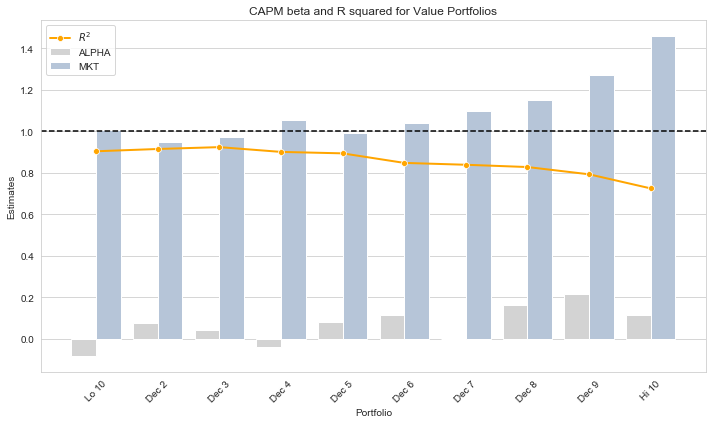

In [65]:
value10_stat = pd.DataFrame({
    'PORT': value10.columns,
    'R squared': capm_tab['Adj_R2'],
    'ALPHA': capm_tab['Alpha'],
    'MKT': capm_tab['MKT']
})

value10_long = value10_stat.melt(id_vars="PORT", value_vars=['ALPHA', 'MKT'], var_name="Metric", value_name="Value")
# Plot the bar chart to resemble the provided style
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='PORT', y='Value', hue='Metric', data=value10_long, palette=['lightgrey', 'lightsteelblue'])
sns.lineplot(x='PORT', y='R squared',data=value10_stat, color="orange", marker="o", linewidth=2,label='$R^2$')
# Add a dashed horizontal reference line at 1
plt.axhline(y=1, linestyle="--", color="black")
plt.title('CAPM beta and R squared for Value Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Estimates')
plt.xticks(rotation=45)
#x.legend(title="term")
plt.tight_layout()
plt.show()

In [66]:
# Create a DataFrame from the dictionaries
factors_tab = pd.DataFrame({
    "Alpha": {portfolio: summary.tables[1].data[1][1] for portfolio, summary in factors_summary.items()},
    "Alpha_t-stat": {portfolio: summary.tables[1].data[1][3] for portfolio, summary in factors_summary.items()},
    "MKT": {portfolio: summary.tables[1].data[2][1] for portfolio, summary in factors_summary.items()},
    "MKT_t-stat": {portfolio: summary.tables[1].data[2][3] for portfolio, summary in factors_summary.items()},
    "SMB": {portfolio: summary.tables[1].data[3][1] for portfolio, summary in factors_summary.items()},
    "SMB_t-stat": {portfolio: summary.tables[1].data[3][3] for portfolio, summary in factors_summary.items()},
    "HML": {portfolio: summary.tables[1].data[4][1] for portfolio, summary in factors_summary.items()},
    "HML_t-stat": {portfolio: summary.tables[1].data[4][3] for portfolio, summary in factors_summary.items()},
    "Adj_R2": {portfolio: summary.tables[0].data[1][3] for portfolio, summary in factors_summary.items()}
})

# Display the DataFrame
print(" Estimation results for the CAPM model on the 10 value portfolios.")
factors_tab = factors_tab.apply(pd.to_numeric)
factors_tab

 Estimation results for the CAPM model on the 10 value portfolios.


,Alpha,Alpha_t-stat,MKT,MKT_t-stat,SMB,SMB_t-stat,HML,HML_t-stat,Adj_R2
Lo 10,0.0126,0.310,1.0756,131.892,-0.0766,-5.738,-0.3243,-27.328,0.945
Dec 2,0.1293,3.043,0.9835,115.780,-0.0076,-0.548,-0.1974,-15.967,0.931
Dec 3,0.0569,1.263,0.9871,109.615,-0.0429,-2.911,-0.0400,-3.054,0.926
Dec 4,-0.0800,-1.460,1.0328,94.197,-0.0246,-1.373,0.1504,9.427,0.908
Dec 5,0.0182,0.366,0.9666,97.351,-0.0681,-4.189,0.2442,16.899,0.916
Dec 6,-0.0007,-0.012,0.9842,86.941,-0.0578,-3.121,0.4284,26.002,0.906
Dec 7,-0.1524,-2.826,1.0076,93.434,0.0213,1.209,0.5475,34.883,0.924
Dec 8,-0.0298,-0.619,1.0200,105.866,0.1208,7.664,0.6644,47.383,0.945
Dec 9,-0.0335,-0.629,1.0905,102.314,0.2373,13.605,0.8435,54.381,0.948
Hi 10,-0.2289,-3.075,1.1786,79.175,0.5535,22.721,1.0830,49.985,0.929


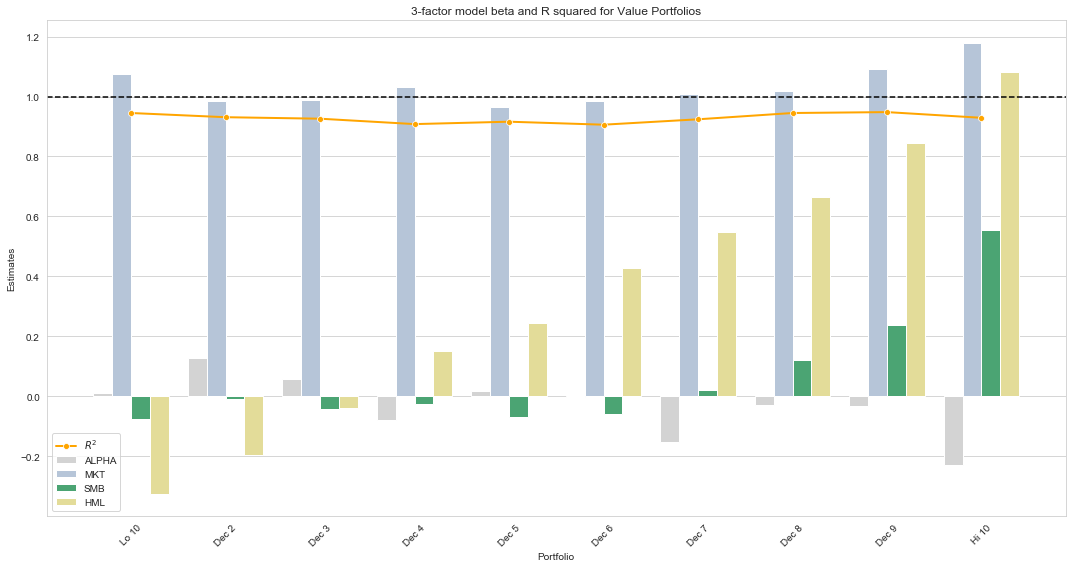

In [67]:
value10_stat_factor = pd.DataFrame({
    'PORT': value10.columns,
    'R squared': factors_tab['Adj_R2'],
    'ALPHA': factors_tab['Alpha'],
    'MKT': factors_tab['MKT'],
    'SMB': factors_tab['SMB'],
    'HML': factors_tab['HML']
})

value10_long_factor = value10_stat_factor.melt(id_vars="PORT", value_vars=['ALPHA', 'MKT','SMB','HML'], var_name="Metric", value_name="Value")
# Plot the bar chart to resemble the provided style
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='PORT', y='Value', hue='Metric', data=value10_long_factor, palette=['lightgrey', 'lightsteelblue', 'mediumseagreen', 'khaki'])
sns.lineplot(x='PORT', y='R squared',data=value10_stat_factor, color="orange", marker="o", linewidth=2,label='$R^2$')
# Add a dashed horizontal reference line at 1
plt.axhline(y=1, linestyle="--", color="black")
plt.title('3-factor model beta and R squared for Value Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Estimates')
plt.xticks(rotation=45)
#x.legend(title="term")
plt.tight_layout()
plt.show()

### 3.5.4 What is style

The data on size and BM portfolio returns provided in French’s data library are constructed for academic research and are not actually traded in financial markets. 

However, there are several products available in the form of mutual funds or ETF for those investors that are interested in getting exposure to these risks. As an example, let’s consider the DFA Small Cap Value mutual fund (ticker: DFSVX) that invests in companies with small capitalization that are considered undervalued according to a valuation ratio (e.g., Book to Market ratio). In this case the name of the fund already provides a clear indication of the type of risks that are involved in investing in such as fund. By regressing the returns of DFSVX on the Fama-French factors we can assess whether the stated investment strategy (small cap value) is indeed followed and whether the fund provides alpha, that is, the expected return that is not due to exposure to market, small cap, and value risks.

In [68]:
import yfinance as yf
ticker = "DFSVX"
DFSVX= yf.download(ticker, start="1993-03-01", interval="1mo")
DFSVX['returns'] = 100*DFSVX['Adj Close'].pct_change()
DFSVX
DFSVX = DFSVX.loc["1993-04-01":"2017-01-01"]
DFSVX

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1993-04-01,9.940000,9.950000,9.590000,9.710000,1.580788,0,-2.116930
1993-05-01,9.740000,9.980000,9.740000,9.970000,1.623116,0,2.677659
1993-06-01,9.980000,10.030000,9.840000,9.970000,1.623116,0,0.000000
1993-07-01,10.020000,10.280000,10.020000,10.270000,1.671956,0,3.009022
1993-08-01,10.330000,10.600000,10.330000,10.600000,1.725680,0,3.213223
...,...,...,...,...,...,...,...
2016-09-01,33.369999,33.930000,32.400002,33.810001,21.750252,0,1.166968
2016-10-01,33.669998,34.209999,32.689999,32.750000,21.076492,0,-3.097709
2016-11-01,32.470001,37.799999,32.150002,37.619999,24.210615,0,14.870230


In [69]:
ff_factors = pd.read_excel('F-F_Research_Data_Factors.xlsx', parse_dates=['Date'], index_col='Date')
ff_factors = ff_factors.loc["199304":"201701"]
ff_factors.shape
ff_factors['DFSVX'] = DFSVX['returns'].values 
ff_factors['DFSVX'] = ff_factors['DFSVX'] - ff_factors['RF']
ff_factors

,Mkt-RF,SMB,HML,RF,DFSVX
Date,,,,,
199304,-3.05,-0.67,2.49,0.24,-2.356930
199305,2.89,2.04,-3.42,0.22,2.457659
199306,0.31,-0.29,2.75,0.25,-0.250000
199307,-0.34,0.96,2.85,0.24,2.769022
199308,3.71,0.13,0.13,0.25,2.963223
...,...,...,...,...,...
201609,0.25,2.12,-1.24,0.02,1.146968
201610,-2.02,-4.40,4.09,0.02,-3.117709
201611,4.86,5.71,8.21,0.01,14.860230


In [70]:
X = ff_factors[['Mkt-RF','SMB','HML']]
X = sm.add_constant(X) # Add a constant term (intercept) to the predictor
y = ff_factors['DFSVX']

# 2. Fit the OLS model
model_DFSVX = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags':1})

# 3. Print the standard summary (homoskedastic/uncorrelated assumption)
print("\n=== OLS Results (HAC/ Newey-West Standard Errors) ===")
print(model_DFSVX.summary())


=== OLS Results (HAC/ Newey-West Standard Errors) ===
                            OLS Regression Results                            
Dep. Variable:                  DFSVX   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     459.8
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          3.07e-108
Time:                        21:44:22   Log-Likelihood:                -738.19
No. Observations:                 286   AIC:                             1484.
Df Residuals:                     282   BIC:                             1499.
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

The results show that DFSVX has statistically significant exposure to all three risk factors, in particular with large positive coefficients both in the SMB and in the HML factors. The $R^2$ of the regression is 0.72 that is high and indicates that the factors explain most of the variation in the fund returns. In addition, the alpha is very close to zero and it is not statistically different from zero. 

The overall picture that emerges is that the DFSVX represents a tradable asset to obtain passive exposure to market, small cap, and value stocks. In addition, keep in mind that we might have ignored the investment strategy followed by the fund, and the simple interpretation of the regression results would have indicated that the manager invests in US small cap value stocks. Although the illustration is for mutual funds that are highly transparent about their investment strategy, the technique can be used also to investigate hedge fund returns or the returns of an investment strategy.

Let’s practice using the Fama-French 3-factor model. Assume that you are assigned the task of classifying the investment style of 7 mistery funds that you are given to analyze. The only information you are provided is that these funds invest in U.S. equity only. This is called style analysis in the sense that you are trying to understand the investment style or philosophy of a mutual or hedge fund.

##  3.6 Omitted variable bias

In [71]:
ticker = "ODMAX"
ODMAX= yf.download(ticker, start="1996-11-01", interval="1mo")
ODMAX['returns'] = 100*ODMAX['Adj Close'].pct_change()
ODMAX
ODMAX = ODMAX.loc["1996-12-01":"2017-01-01"]
ODMAX

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1996-12-01,9.940000,10.150000,9.780000,10.150000,3.325798,0,2.525264
1997-01-01,10.130000,11.090000,10.130000,11.090000,3.633803,0,9.261082
1997-02-01,11.170000,11.860000,11.140000,11.680000,3.827126,0,5.320146
1997-03-01,11.690000,11.900000,11.600000,11.660000,3.820572,0,-0.171255
1997-04-01,11.560000,11.830000,11.520000,11.830000,3.876275,0,1.457961
...,...,...,...,...,...,...,...
2016-09-01,33.599998,34.799999,33.430000,34.270000,31.332920,0,2.451397
2016-10-01,34.610001,34.880001,33.980000,34.320000,31.378639,0,0.145914
2016-11-01,34.110001,34.110001,31.930000,32.590000,29.796906,0,-5.040798


In [72]:
ff_factors = pd.read_excel('F-F_Research_Data_Factors.xlsx', parse_dates=['Date'], index_col='Date')
ff_factors = ff_factors.loc["199612":"201701"]
ff_factors.shape
ff_factors['ODMAX'] = ODMAX['returns'].values 
ff_factors['ODMAX'] = ff_factors['ODMAX'] - ff_factors['RF']
ff_factors

,Mkt-RF,SMB,HML,RF,ODMAX
Date,,,,,
199612,-1.70,3.16,1.31,0.46,2.065264
199701,4.99,-1.95,-1.42,0.45,8.811082
199702,-0.49,-3.22,5.67,0.39,4.930146
199703,-5.03,-0.36,3.39,0.43,-0.601255
199704,4.04,-5.77,0.07,0.43,1.027961
...,...,...,...,...,...
201609,0.25,2.12,-1.24,0.02,2.431397
201610,-2.02,-4.40,4.09,0.02,0.125914
201611,4.86,5.71,8.21,0.01,-5.050798


An important assumption that is introduced when deriving the properties of the OLS estimator is that the regressors included in the model represent all those that are relevant to explain the dependent variable. However, in practice it is difficult to make sure that this assumption is satisfied. In some situations we might not observe a variable that we believe relevant to explain the dependent variable, while in other situations we might not know which variables are actually relevant. What is the effect of omitting relevant variables on the OLS coefficient estimates? The answer depends on the correlation between the omitted variable and the included variable(s). If the omitted and included variables are correlated, then the estimate of the slope coefficients of the regressors will be biased, that is, they will be significantly different from their true value. However, if we omit a relevant variable that is not correlated with any of the included variables, then we do not expect any bias in the coefficient estimate. To illustrate this concept, we will discuss first an example on financial data and then perform a simulation exercise to illustrate the bias.

Assume that we are given to analyze a mutual fund return with the aim to understand the risk factors underlying the performance of the fund. Take this as another mistery fund that we want to classify in terms of investment style. We could start the empirical analysis as we did earlier, by assuming that the relevant factors to include in the regression are the Fama-French factors. The 3-factor model is thus given by $$ and its estimation by OLS provides the following results:

In [73]:
X = ff_factors[['Mkt-RF','SMB','HML']]
X = sm.add_constant(X) # Add a constant term (intercept) to the predictor
y = ff_factors['ODMAX']

# 2. Fit the OLS model
model_DFSVX = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags':1})

# 3. Print the standard summary (homoskedastic/uncorrelated assumption)
print("\n=== OLS Results (HAC/ Newey-West Standard Errors) ===")
print(model_DFSVX.summary())


=== OLS Results (HAC/ Newey-West Standard Errors) ===
                            OLS Regression Results                            
Dep. Variable:                  ODMAX   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     54.30
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           8.93e-27
Time:                        21:44:51   Log-Likelihood:                -780.58
No. Observations:                 242   AIC:                             1569.
Df Residuals:                     238   BIC:                             1583.
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

The fund has an exposure of 0.89 against the US equity market that is highly significant. In addition, there seems to be significant exposure to SMB with a coefficient of 0.25, but not to HML. In addition, the $R^2$ of the regression is equal to 0.36, which indicates a poor fit, and for this type of regressions we typically expect larger goodness-of-fit statistics (see the previous Section). Based on these results, we would conclude that the exposure to MKT makes the fund sensitive to the fluctuations of the overall US equity market, in addition to some exposure to the small cap premium deriving from increase exposure to small caps. However, it turns out that the fund is the Invesco Developing Markets (ticker: ODMAX) which is a fund that invests exclusively in stocks from emerging markets and does not hold any US stock. 

How do we make sense of the regression results above and the stated investment strategy of the fund? How is it possible that the exposures to the MKT and SMB are large and significant in the regression above but the fund does not hold any US stock? It is possible because the MKT and SMB might be correlated with an omitted risk factor (e.g., emerging market risk) which causes bias in the estimates for MKT and SMB. The bias is due to the fact that omitting a relevant risk factor makes the MKT and SMB look significant since they co-move, to a certain extent, to that omitted factor although they would not be relevant if the omitted factor was included. The solution in this application is to include other factors that are more appropriate to proxy for the risk exposure of the fund. Given the investment objective of the fund, we could consider including as an additional risk factor the MSCI Emerging Markets (EM) Index. In terms of correlation between the EM factor and the Fama-French factors, the results below indicate that there is a strong positive correlation with the US-equity market and by smaller correlations with SMB (positive) and HML (negative).

In [74]:
ticker = "EMX"
EMX = yf.download(ticker, start="1996-11-01", interval="1mo")
EMX['returns'] = 100*ODMAX['Adj Close'].pct_change()
EMX
EMX= ODMAX.loc["1996-12-01":"2017-01-01"]
EMX

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1996-12-01,9.940000,10.150000,9.780000,10.150000,3.325798,0,2.525264
1997-01-01,10.130000,11.090000,10.130000,11.090000,3.633803,0,9.261082
1997-02-01,11.170000,11.860000,11.140000,11.680000,3.827126,0,5.320146
1997-03-01,11.690000,11.900000,11.600000,11.660000,3.820572,0,-0.171255
1997-04-01,11.560000,11.830000,11.520000,11.830000,3.876275,0,1.457961
...,...,...,...,...,...,...,...
2016-09-01,33.599998,34.799999,33.430000,34.270000,31.332920,0,2.451397
2016-10-01,34.610001,34.880001,33.980000,34.320000,31.378639,0,0.145914
2016-11-01,34.110001,34.110001,31.930000,32.590000,29.796906,0,-5.040798


In [77]:
ff_factors['EMX'] = EMX['returns'].values 
ff_factors.corr()


,Mkt-RF,SMB,HML,RF,ODMAX,EMX
Mkt-RF,1.000000,0.241278,-0.135567,-0.061914,0.574276,0.572930
SMB,0.241278,1.000000,-0.276618,-0.063637,0.280239,0.278802
HML,-0.135567,-0.276618,1.000000,0.078923,-0.241696,-0.239895
RF,-0.061914,-0.063637,0.078923,1.000000,-0.019012,0.004328
ODMAX,0.574276,0.280239,-0.241696,-0.019012,1.000000,0.999728
EMX,0.572930,0.278802,-0.239895,0.004328,0.999728,1.000000


It seems thus reasonable to include the EM factor as an additional risk factor to explain the performance of ODMAX. The Table below shows the estimation results of a regression of ODMAX excess monthly returns on 4 factors, the EM factor in addition to the FF factors.

In [78]:
X = ff_factors[['EMX','Mkt-RF','SMB','HML']]
X = sm.add_constant(X) # Add a constant term (intercept) to the predictor
y = ff_factors['ODMAX']

# 2. Fit the OLS model
model_DFSVX = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags':1})

# 3. Print the standard summary (homoskedastic/uncorrelated assumption)
print("\n=== OLS Results (HAC/ Newey-West Standard Errors) ===")
print(model_DFSVX.summary())


=== OLS Results (HAC/ Newey-West Standard Errors) ===
                            OLS Regression Results                            
Dep. Variable:                  ODMAX   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.054e+05
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:46:55   Log-Likelihood:                 74.906
No. Observations:                 242   AIC:                            -139.8
Df Residuals:                     237   BIC:                            -122.4
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

Not surprisingly, the estimated exposure to EM is 0.99 and highly significant, whilst the exposure to the FF factors has declined significantly. In particular, adding EM to the regression has the effect of reducing the coefficient of the MKT from 0.8921 to 0.0036. The drop in the MKT beta is due to the fact that in the first regression part of the coefficient of MKT was actually proxing for the effect of EM. The estimate from the first regression of 0.8921 is biased because it captures both the effect of MKT on ODMAX, but also represents a good proxy for the omitted source of risk of the EM Index, given the large and positive correlation between MKT and EM. 

The effect of omitted variables and the resulting bias in the coefficient estimates is not only an econometric issue, but it has important practical implications. If we use the LRM for performance attribution, that is, disentangling the systematic component of the fund return (beta) from the risk-adjusted part (alpha), then omitting some relevant risk factors has the effect of producing bias in the remaining coefficients and thus changes our conclusion about the contribution of each component to the performance of the fund. Typically, for mutual funds we have a clear idea of the investment strategy and the type of risks that the asset returns are exposed to. However, hedge funds are less transparent about their investment strategy and it might be difficult to pick the right factors and the coefficient estimates might be biased.